<a href="https://colab.research.google.com/github/RRM2021/Support_development_plans/blob/main/MapaRiesgosSalud3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASESORÍA TÉCNICA EN CIENCIA DE DATOS PARA EL PLAN DE DESARROLLO 2024-2027 DEL MUNICIPIO DE GUARNE

PERFILES DE RIESGO PERSONAS ATENDIDAS EN SERVICIOS DE SALUD 2020-2024 - SECRETARÍA DE SALUD DEL MUNICIPIO DE GUARNE

RICARDO RAMIREZ - INGENIERO CIENTÍFICO DE DATOS - ASESOR

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

A continuación, se descarga el set de datos entregado por la Secretaría de Salud del municipio de Guarne.

In [ ]:
# Specify the file path (replace 'your_file.txt' with the actual file name)
file_path = '/content/sample_data/CONSULTA SIVIGILA 2020-2024 GUARNE.xlsx'

# Read the text file into a DataFrame
df_1 = pd.read_excel(file_path)  # Use the appropriate separator if not comma-separated

# Optionally, you can specify column names if the file doesn't have a header row
# df = pd.read_csv(file_path, sep='\t', names=['Column1', 'Column2', ...])

# Display the DataFrame
# Set the display option to show all columns
pd.set_option('display.max_columns', None)
df_1.head()  # Use df to perform operations or analysis

,cod_eve,año,edad_,nacionali_,nombre_nacionalidad,sexo_,area_,localidad_,cen_pobla_,vereda_,bar_ver_,ocupacion_,tip_ss_,cod_ase_,per_etn_,estrato_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,sem_ges,gp_indigen,gp_pobicbf,gp_mad_com,gp_desmovi,gp_psiquia,gp_vic_vio,gp_otros,tip_cas_,pac_hos_,con_fin_,ajuste_,nom_eve,ndep_resi,nmun_resi
0,155,2020,61.0,170.0,COLOMBIA,F,3.0,NaN,NaN,VDA LA HONDITA,NaN,99999.04,C,EPS002,6.0,3.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,7,CÁNCER DE LA MAMA Y CUELLO UTERINO,ANTIOQUIA,GUARNE
1,155,2020,57.0,170.0,COLOMBIA,F,2.0,NaN,CRA 50 38 34,NaN,NaN,99999.04,C,EPS037,6.0,3.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,6,CÁNCER DE LA MAMA Y CUELLO UTERINO,ANTIOQUIA,GUARNE
2,813,2020,27.0,170.0,COLOMBIA,F,3.0,NaN,NaN,JUAN XXIII,NaN,99999.01,S,EPS001,6.0,NaN,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,1.0,6,TUBERCULOSIS,ANTIOQUIA,GUARNE
3,155,2020,62.0,170.0,COLOMBIA,F,2.0,NaN,CARRERA 50 38-36 AP,NaN,NaN,96220.00,C,EPS010,6.0,3.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,6,CÁNCER DE LA MAMA Y CUELLO UTERINO,ANTIOQUIA,GUARNE
4,155,2020,36.0,170.0,COLOMBIA,F,1.0,NaN,NaN,NaN,9999999 SIN INFORMACION,99999.04,S,EPSS40,6.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,7,CÁNCER DE LA MAMA Y CUELLO UTERINO,ANTIOQUIA,GUARNE


Se obtiene información del set de datos. Contiene 2723 entradas, que corresponden a personas que han solicitado atención médica; y 36 columnas, que representan 36 variables de análisis. También se obtiene el tipo de variable y los datos nulos.

In [ ]:
df_1.info()
print(df_1.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2723 entries, 0 to 2722
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cod_eve              2723 non-null   int64  
 1   año                  2723 non-null   int64  
 2   edad_                2702 non-null   float64
 3   nacionali_           2702 non-null   float64
 4   nombre_nacionalidad  2702 non-null   object 
 5   sexo_                2702 non-null   object 
 6   area_                2720 non-null   float64
 7   localidad_           567 non-null    object 
 8   cen_pobla_           377 non-null    object 
 9   vereda_              1415 non-null   object 
 10  bar_ver_             881 non-null    object 
 11  ocupacion_           2687 non-null   float64
 12  tip_ss_              2722 non-null   object 
 13  cod_ase_             2564 non-null   object 
 14  per_etn_             2722 non-null   float64
 15  estrato_             2515 non-null   f

CORRECCIÓN DE DATOS NULOS

In [ ]:
import pandas as pd
import numpy as np

# Iterate over columns
for col in df_1.columns:
    # Calculate the mode (most frequent value)
    mode_value = df_1[col].mode()[0]
    # Replace null values with the mode
    df_1[col].fillna(mode_value, inplace=True)

# Print the DataFrame after replacing null values
df_1.head()

,cod_eve,año,edad_,nacionali_,nombre_nacionalidad,sexo_,area_,localidad_,cen_pobla_,vereda_,bar_ver_,ocupacion_,tip_ss_,cod_ase_,per_etn_,estrato_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,sem_ges,gp_indigen,gp_pobicbf,gp_mad_com,gp_desmovi,gp_psiquia,gp_vic_vio,gp_otros,tip_cas_,pac_hos_,con_fin_,ajuste_,nom_eve,ndep_resi,nmun_resi
0,155,2020,61.0,170.0,COLOMBIA,F,3.0,GUARNE,GUARNE,VDA LA HONDITA,9999999 SIN INFORMACION,99999.04,C,EPS002,6.0,3.0,2.0,2.0,2.0,2.0,2.0,37.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,7,CÁNCER DE LA MAMA Y CUELLO UTERINO,ANTIOQUIA,GUARNE
1,155,2020,57.0,170.0,COLOMBIA,F,2.0,GUARNE,CRA 50 38 34,CHAPARRAL,9999999 SIN INFORMACION,99999.04,C,EPS037,6.0,3.0,2.0,2.0,2.0,2.0,2.0,37.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,6,CÁNCER DE LA MAMA Y CUELLO UTERINO,ANTIOQUIA,GUARNE
2,813,2020,27.0,170.0,COLOMBIA,F,3.0,GUARNE,GUARNE,JUAN XXIII,9999999 SIN INFORMACION,99999.01,S,EPS001,6.0,3.0,2.0,2.0,2.0,2.0,2.0,37.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,1.0,6,TUBERCULOSIS,ANTIOQUIA,GUARNE
3,155,2020,62.0,170.0,COLOMBIA,F,2.0,GUARNE,CARRERA 50 38-36 AP,CHAPARRAL,9999999 SIN INFORMACION,96220.00,C,EPS010,6.0,3.0,2.0,2.0,2.0,2.0,2.0,37.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,6,CÁNCER DE LA MAMA Y CUELLO UTERINO,ANTIOQUIA,GUARNE
4,155,2020,36.0,170.0,COLOMBIA,F,1.0,GUARNE,GUARNE,CHAPARRAL,9999999 SIN INFORMACION,99999.04,S,EPSS40,6.0,1.0,2.0,2.0,2.0,2.0,2.0,37.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,7,CÁNCER DE LA MAMA Y CUELLO UTERINO,ANTIOQUIA,GUARNE


Con el objetivo de facilitar el análisis, se seleccionan las variables con mayor capacidad de aportar información, y se obtiene un nuevo set de datos con 30 variables.

In [ ]:
# Specify the column(s) you want to drop by index
columns_to_drop = [4, 7, 8, 9, 10, 21]

# Use the drop method to remove the specified columns by index
df_2 = df_1.drop(columns=df_1.columns[columns_to_drop])
df_2.head()

,cod_eve,año,edad_,nacionali_,sexo_,area_,ocupacion_,tip_ss_,cod_ase_,per_etn_,estrato_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_indigen,gp_pobicbf,gp_mad_com,gp_desmovi,gp_psiquia,gp_vic_vio,gp_otros,tip_cas_,pac_hos_,con_fin_,ajuste_,nom_eve,ndep_resi,nmun_resi
0,155,2020,61.0,170.0,F,3.0,99999.04,C,EPS002,6.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,7,CÁNCER DE LA MAMA Y CUELLO UTERINO,ANTIOQUIA,GUARNE
1,155,2020,57.0,170.0,F,2.0,99999.04,C,EPS037,6.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,6,CÁNCER DE LA MAMA Y CUELLO UTERINO,ANTIOQUIA,GUARNE
2,813,2020,27.0,170.0,F,3.0,99999.01,S,EPS001,6.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,1.0,6,TUBERCULOSIS,ANTIOQUIA,GUARNE
3,155,2020,62.0,170.0,F,2.0,96220.00,C,EPS010,6.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,6,CÁNCER DE LA MAMA Y CUELLO UTERINO,ANTIOQUIA,GUARNE
4,155,2020,36.0,170.0,F,1.0,99999.04,S,EPSS40,6.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,7,CÁNCER DE LA MAMA Y CUELLO UTERINO,ANTIOQUIA,GUARNE


In [ ]:
# Tamaño del set de datos
df_2.shape

(2723, 30)

SE APLICA ESTADÍSTICA DESCRIPTIVA A CADA VARIABLE

In [ ]:
df_2.describe()

,cod_eve,año,edad_,nacionali_,area_,ocupacion_,per_etn_,estrato_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_indigen,gp_pobicbf,gp_mad_com,gp_desmovi,gp_psiquia,gp_vic_vio,gp_otros,tip_cas_,pac_hos_,con_fin_
count,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.0,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000
mean,442.799486,2022.575468,32.291223,208.518546,2.181418,80246.296717,5.987881,2.536541,1.996328,1.997797,1.975395,1.999266,1.947117,1.998531,1.999633,2.0,2.0,1.997062,1.996695,1.062431,3.145061,1.699596,1.012486
std,243.684539,0.912249,21.799029,158.299602,0.910059,32773.775508,0.201574,0.688179,0.060500,0.046898,0.154947,0.027096,0.223841,0.038306,0.019164,0.0,0.0,0.054133,0.057406,0.241981,1.165841,0.458518,0.117492
min,0.000000,2019.000000,1.000000,156.000000,1.000000,1100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0,2.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,300.000000,2022.000000,15.000000,170.000000,1.000000,75130.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.0,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,342.000000,2023.000000,29.000000,170.000000,3.000000,99999.010000,6.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.0,2.000000,2.000000,1.000000,4.000000,2.000000,1.000000
75%,549.000000,2023.000000,48.000000,170.000000,3.000000,99999.050000,6.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.0,2.000000,2.000000,1.000000,4.000000,2.000000,1.000000
max,900.000000,2024.000000,95.000000,862.000000,3.000000,99999.080000,6.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.0,2.000000,2.000000,2.000000,5.000000,2.000000,2.000000


In [ ]:
df_2.describe(include=['object'])

,sexo_,tip_ss_,cod_ase_,ajuste_,nom_eve,ndep_resi,nmun_resi
count,2723,2723,2723,2723,2723,2723,2723
unique,2,6,49,7,42,4,32
top,F,C,EPS010,0,AGRESIONES POR ANIMALES POTENCIALMENTE TRANSMI...,ANTIOQUIA,GUARNE
freq,1595,1887,1338,1929,945,2717,2517


SE CREAN TABLAS DE FRECUENCIA DE CADA VARIABLE

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
# Loop through each column in the DataFrame
for column in df_2.columns:
    # Create a frequency table for the current column
    freq_table = df_2[column].value_counts().reset_index()
    freq_table.columns = [column, 'Frequency']

    # Calculate the percentage and add it to the frequency table
    freq_table['Percentage'] = (freq_table['Frequency'] / freq_table['Frequency'].sum()) * 100

    # Calculate the cumulative percentage and add it to the frequency table
    freq_table['Cumulative Percentage'] = freq_table['Percentage'].cumsum()

    # Display the frequency table with the Percentage and Cumulative Percentage columns
    print(f"Frequency table for column: {column}")
    print(freq_table)
    print("\n")


Frequency table for column: cod_eve
    cod_eve  Frequency  Percentage  Cumulative Percentage
0       300        945   34.704370              34.704370
1       875        431   15.828131              50.532501
2       348        238    8.740360              59.272861
3       342        201    7.381564              66.654425
4       356        149    5.471906              72.126331
5       155        108    3.966214              76.092545
6       549        103    3.782593              79.875138
7       850         57    2.093279              81.968417
8       813         54    1.983107              83.951524
9       215         47    1.726037              85.677562
10      365         44    1.615865              87.293426
11      831         39    1.432244              88.725670
12      110         32    1.175174              89.900845
13      113         29    1.065002              90.965846
14      345         26    0.954829              91.920676
15      750         21    0.771208  

SE CONSTRUYEN HISTOGRAMAS DE FRECUENCIAS DE CADA VARIABLE

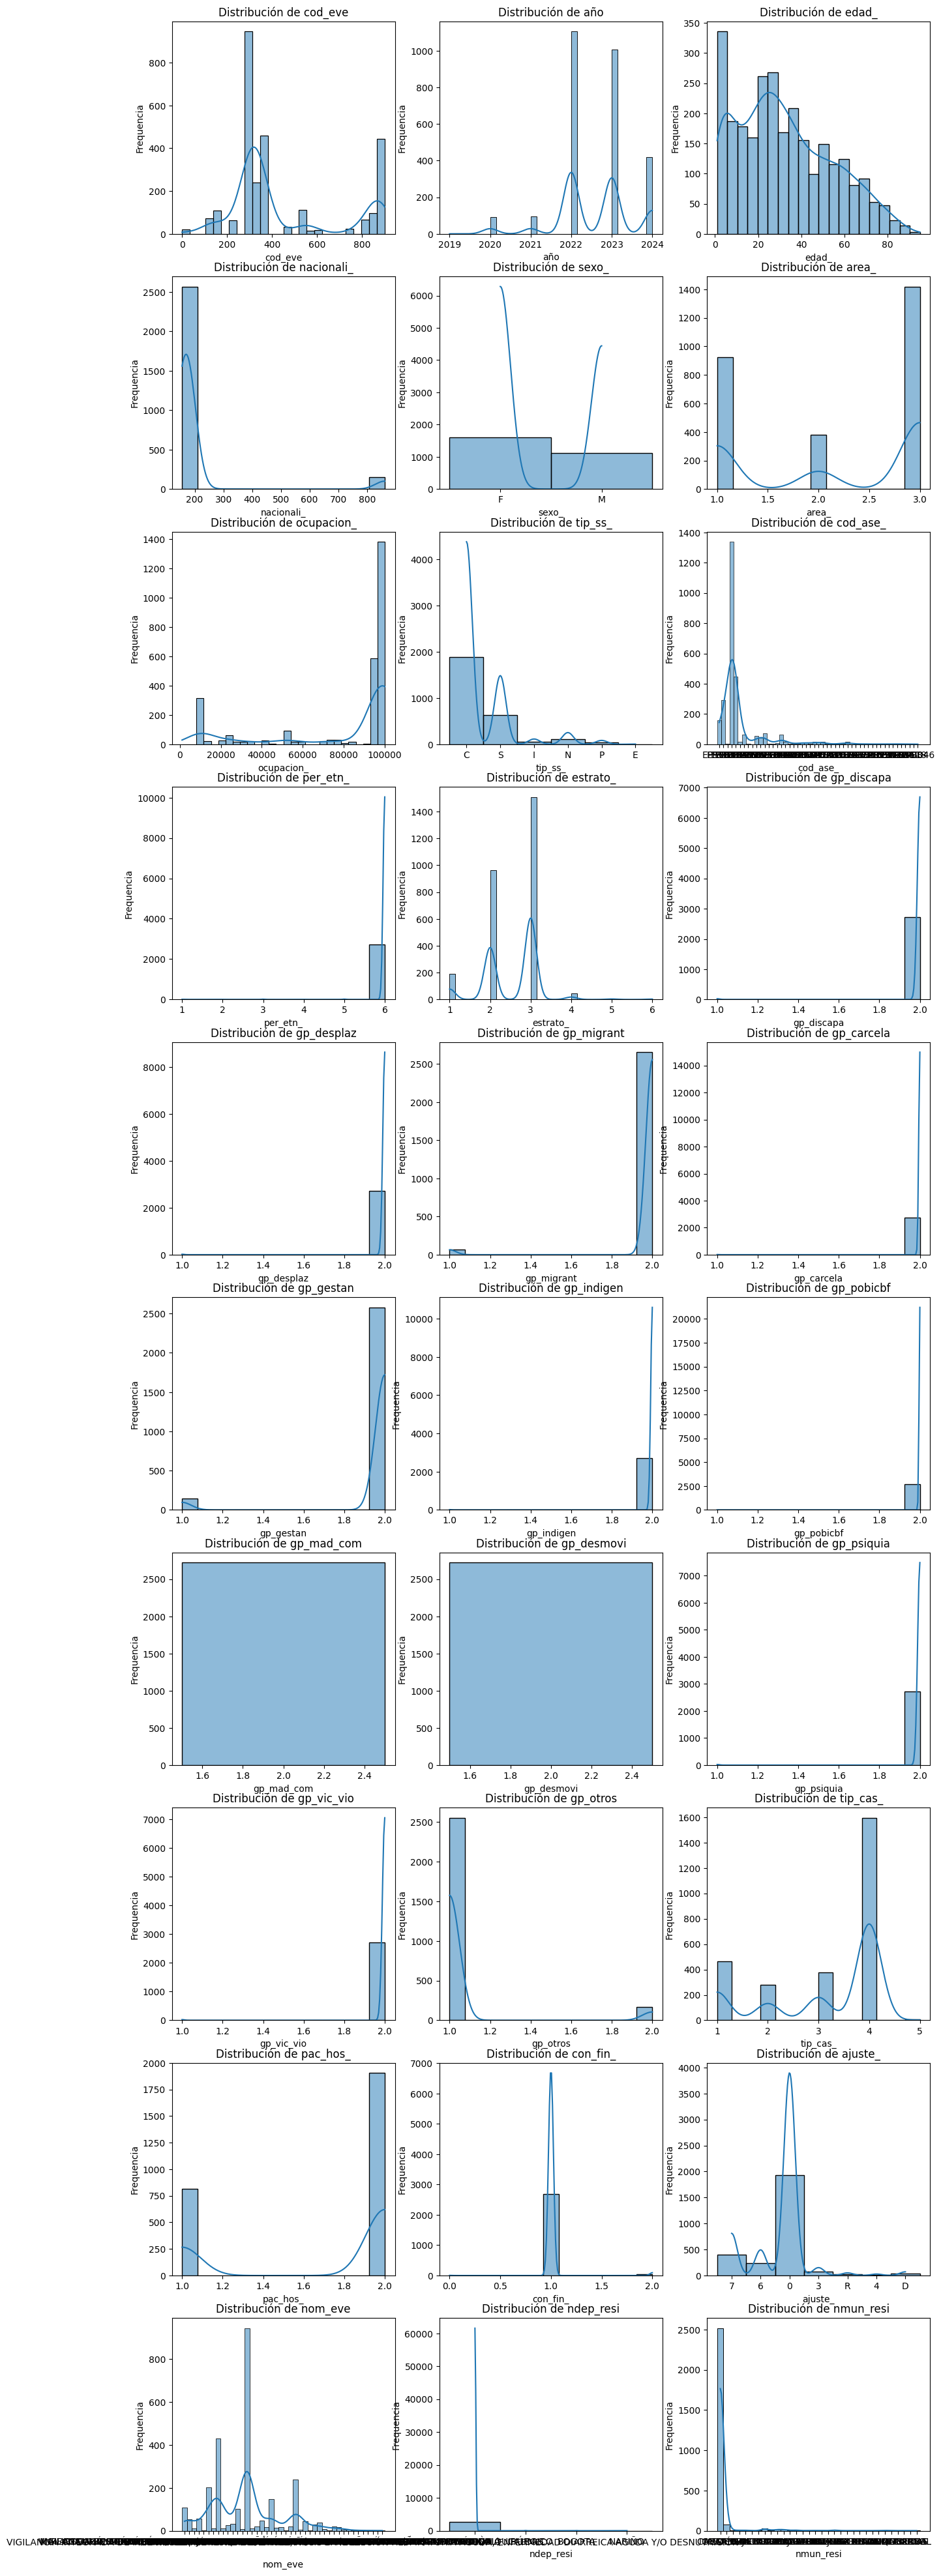

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
num_cols = len(df_2.columns)

# Determine the number of rows and columns for subplot grid
num_rows = num_cols // 3 + (num_cols % 3 > 0)  # Adjust the number of columns per row as needed

#fig, axes = plt.subplots(3, int(num_cols / 6) + 1, figsize=(15, 15))
# Create a subplot grid with the appropriate number of rows and columns
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
# Flatten the axes array for ease of use
axes = axes.flatten()

for i, column in enumerate(df_2.columns):
    # Create a histogram plot for the current column if index is within the number of columns
    if i < num_cols:
        sns.histplot(data=df_2, x=column, kde=True, ax=axes[i])
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequencia')
        axes[i].set_title(f'Distribución de {column}')
    else:
        # Hide empty subplots
        axes[i].axis('off')

plt.tight_layout()
plt.show()

CODIFICACIÓN DE DATOS CATEGÓRICOS

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df_3 = df_2

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Specify the columns to encode
columns_to_encode = ['sexo_', 'tip_ss_', 'cod_ase_', 'ajuste_', 'ndep_resi', 'nmun_resi']  # Specify your column names here

# Dictionary to store each label encoder for each column
label_encoders = {}

# Apply LabelEncoder to the specified columns and store the encoders
for col in columns_to_encode:
    le = LabelEncoder()
    df_3[col] = le.fit_transform(df_3[col])
    label_encoders[col] = le

# Print the encoded DataFrame
df_3.head()


,cod_eve,año,edad_,nacionali_,sexo_,area_,ocupacion_,tip_ss_,cod_ase_,per_etn_,estrato_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_indigen,gp_pobicbf,gp_mad_com,gp_desmovi,gp_psiquia,gp_vic_vio,gp_otros,tip_cas_,pac_hos_,con_fin_,ajuste_,nom_eve,ndep_resi,nmun_resi
0,155,2020,61.0,170.0,0,3.0,99999.04,0,9,6.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,4,CÁNCER DE LA MAMA Y CUELLO UTERINO,0,12
1,155,2020,57.0,170.0,0,2.0,99999.04,0,15,6.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,3,CÁNCER DE LA MAMA Y CUELLO UTERINO,0,12
2,813,2020,27.0,170.0,0,3.0,99999.01,5,8,6.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,1.0,3,TUBERCULOSIS,0,12
3,155,2020,62.0,170.0,0,2.0,96220.00,0,12,6.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,3,CÁNCER DE LA MAMA Y CUELLO UTERINO,0,12
4,155,2020,36.0,170.0,0,1.0,99999.04,5,33,6.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,4,CÁNCER DE LA MAMA Y CUELLO UTERINO,0,12


SE IDENTIFICAN LOS VALORES CODIFICADOS PARA CADA CATEGORÍA

In [ ]:
# Print the mapping of categorical values to labels
for col, le in label_encoders.items():
    print(f"\nMapping for column '{col}':")
    for class_index, class_label in enumerate(le.classes_):
        print(f"{class_label} -> {class_index}")



Mapping for column 'sexo_':
F -> 0
M -> 1

Mapping for column 'tip_ss_':
C -> 0
E -> 1
I -> 2
N -> 3
P -> 4
S -> 5

Mapping for column 'cod_ase_':
37086 -> 0
CCF053 -> 1
CCF055 -> 2
CCFC55 -> 3
EAS016 -> 4
EMP021 -> 5
EMP023 -> 6
EMP028 -> 7
EPS001 -> 8
EPS002 -> 9
EPS005 -> 10
EPS008 -> 11
EPS010 -> 12
EPS016 -> 13
EPS017 -> 14
EPS037 -> 15
EPS040 -> 16
EPS041 -> 17
EPS042 -> 18
EPS044 -> 19
EPS046 -> 20
EPSC34 -> 21
EPSI03 -> 22
EPSI04 -> 23
EPSS01 -> 24
EPSS02 -> 25
EPSS05 -> 26
EPSS10 -> 27
EPSS16 -> 28
EPSS17 -> 29
EPSS26 -> 30
EPSS34 -> 31
EPSS37 -> 32
EPSS40 -> 33
EPSS41 -> 34
EPSS42 -> 35
ESS024 -> 36
ESS062 -> 37
ESS091 -> 38
ESS118 -> 39
ESS207 -> 40
ESSC07 -> 41
ESSC24 -> 42
ESSC91 -> 43
RES001 -> 44
RES003 -> 45
RES004 -> 46
RES008 -> 47
RES011 -> 48

Mapping for column 'ajuste_':
0 -> 0
3 -> 1
4 -> 2
6 -> 3
7 -> 4
D -> 5
R -> 6

Mapping for column 'ndep_resi':
ANTIOQUIA -> 0
BOGOTA -> 1
CALDAS -> 2
NARIÑO -> 3

Mapping for column 'nmun_resi':
AGUADAS -> 0
AMALFI -> 1
BELL

SE CONSTRUYE UNA MATRIZ DE CORRELACIONES Y UN MAPA DE CALOR DE LAS CORRELACIONES

Correlation Matrix:
             cod_eve       año     edad_  nacionali_     sexo_     area_  \
cod_eve     1.000000  0.082519 -0.013945    0.052592 -0.125415 -0.048107   
año         0.082519  1.000000 -0.060823    0.021724  0.019513  0.094131   
edad_      -0.013945 -0.060823  1.000000   -0.106890 -0.076058  0.047576   
nacionali_  0.052592  0.021724 -0.106890    1.000000 -0.042879  0.046473   
sexo_      -0.125415  0.019513 -0.076058   -0.042879  1.000000  0.037167   
area_      -0.048107  0.094131  0.047576    0.046473  0.037167  1.000000   
ocupacion_ -0.017873  0.223780  0.032877   -0.006894 -0.035609  0.068270   
tip_ss_     0.034048  0.021754 -0.019763    0.143979  0.006209  0.061684   
cod_ase_    0.024886  0.040226  0.026896    0.011729 -0.004751  0.049065   
per_etn_   -0.005876  0.013966 -0.003878    0.014635  0.006179 -0.034072   
estrato_   -0.103037 -0.089393 -0.017668   -0.027699  0.048523 -0.228217   
gp_discapa -0.023523  0.091557  0.016132    0.014776 -0.035219  0.03

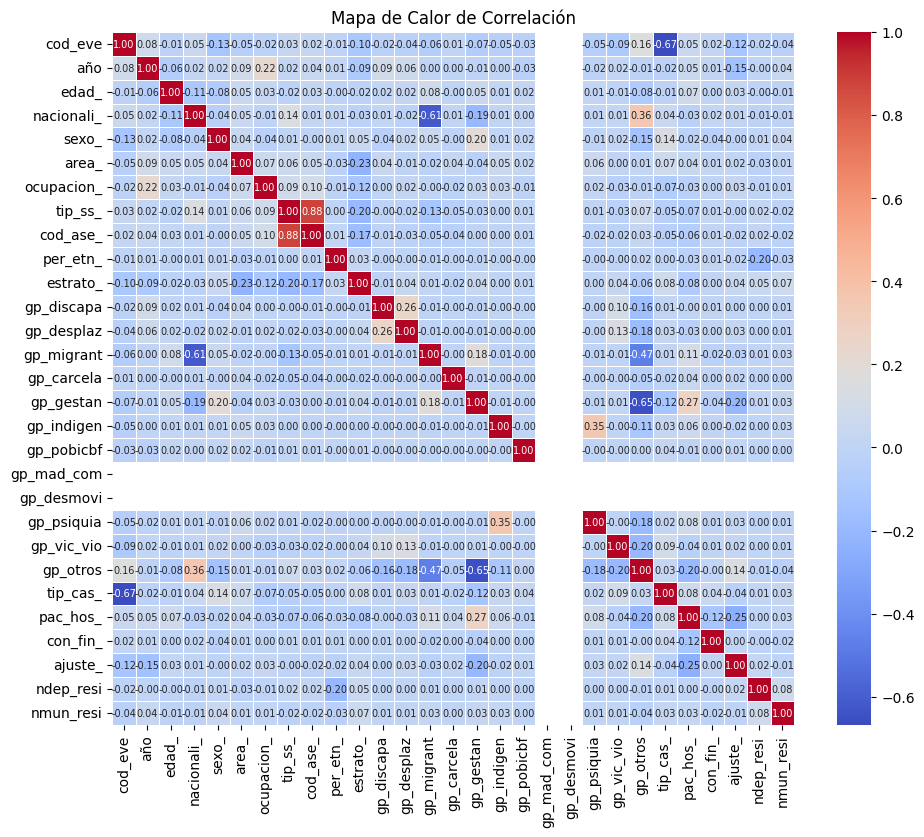

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_df = df_3.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(11, 9))  # Adjust the figsize as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 7})
plt.title('Mapa de Calor de Correlación')
plt.show()


CON BASE EN LA DISTRIBUCIÓN DE CADA VARIABLE Y LA CORRELACIÓN ENTRE VARIABLES, SE SELECCIONAN LAS VARIABLES DEFINITIVAS PARA EL ANÁLISIS

In [ ]:
df_3.info()
print(df_3.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2723 entries, 0 to 2722
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cod_eve     2723 non-null   int64  
 1   año         2723 non-null   int64  
 2   edad_       2723 non-null   float64
 3   nacionali_  2723 non-null   float64
 4   sexo_       2723 non-null   int64  
 5   area_       2723 non-null   float64
 6   ocupacion_  2723 non-null   float64
 7   tip_ss_     2723 non-null   int64  
 8   cod_ase_    2723 non-null   int64  
 9   per_etn_    2723 non-null   float64
 10  estrato_    2723 non-null   float64
 11  gp_discapa  2723 non-null   float64
 12  gp_desplaz  2723 non-null   float64
 13  gp_migrant  2723 non-null   float64
 14  gp_carcela  2723 non-null   float64
 15  gp_gestan   2723 non-null   float64
 16  gp_indigen  2723 non-null   float64
 17  gp_pobicbf  2723 non-null   float64
 18  gp_mad_com  2723 non-null   float64
 19  gp_desmovi  2723 non-null  

In [ ]:
# Specify the column(s) you want to drop by index
columns_to_drop = [9, 11, 12, 14, 16, 17, 18, 19, 20, 21, 28, 23, 13, 22, 27]

# Use the drop method to remove the specified columns by index
df_4 = df_3.drop(columns=df_3.columns[columns_to_drop])
df_4.head()

,cod_eve,año,edad_,nacionali_,sexo_,area_,ocupacion_,tip_ss_,cod_ase_,estrato_,gp_gestan,pac_hos_,con_fin_,ajuste_,nmun_resi
0,155,2020,61.0,170.0,0,3.0,99999.04,0,9,3.0,2.0,2.0,1.0,4,12
1,155,2020,57.0,170.0,0,2.0,99999.04,0,15,3.0,2.0,2.0,1.0,3,12
2,813,2020,27.0,170.0,0,3.0,99999.01,5,8,3.0,2.0,1.0,1.0,3,12
3,155,2020,62.0,170.0,0,2.0,96220.00,0,12,3.0,2.0,2.0,1.0,3,12
4,155,2020,36.0,170.0,0,1.0,99999.04,5,33,1.0,2.0,2.0,1.0,4,12


VARIABLES SELECCIONADAS

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
column_names = df_4.columns.tolist()
# Define the number of elements to display on each line
elements_per_line = 10  # You can change this number as needed
# Iterate over the list and group elements for each line
for i in range(0, len(column_names), elements_per_line):
    line_elements = column_names[i:i + elements_per_line]
    line = ', '.join(line_elements)
    print(line)

cod_eve, año, edad_, nacionali_, sexo_, area_, ocupacion_, tip_ss_, cod_ase_, estrato_
gp_gestan, pac_hos_, con_fin_, ajuste_, nmun_resi


ESTANDARIZACIÓN DEL SET DE DATOS

In [ ]:
X = df_4.values
X

array([[1.550e+02, 2.020e+03, 6.100e+01, ..., 1.000e+00, 4.000e+00,
        1.200e+01],
       [1.550e+02, 2.020e+03, 5.700e+01, ..., 1.000e+00, 3.000e+00,
        1.200e+01],
       [8.130e+02, 2.020e+03, 2.700e+01, ..., 1.000e+00, 3.000e+00,
        1.200e+01],
       ...,
       [3.420e+02, 2.024e+03, 2.500e+01, ..., 2.000e+00, 4.000e+00,
        1.200e+01],
       [3.420e+02, 2.024e+03, 4.400e+01, ..., 1.000e+00, 0.000e+00,
        1.200e+01],
       [3.420e+02, 2.024e+03, 1.500e+01, ..., 1.000e+00, 0.000e+00,
        1.200e+01]])

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.18124994, -2.82372751,  1.31721692, ..., -0.10629257,
         1.77364047, -0.15503417],
       [-1.18124994, -2.82372751,  1.13368881, ..., -0.10629257,
         1.17944473, -0.15503417],
       [ 1.51945836, -2.82372751, -0.24277204, ..., -0.10629257,
         1.17944473, -0.15503417],
       ...,
       [-0.41372342,  1.56184786, -0.3345361 , ...,  8.40649155,
         1.77364047, -0.15503417],
       [-0.41372342,  1.56184786,  0.53722244, ..., -0.10629257,
        -0.6031425 , -0.15503417],
       [-0.41372342,  1.56184786, -0.79335638, ..., -0.10629257,
        -0.6031425 , -0.15503417]])

REDUCCIÓN DE LA DIMENSIONALIDAD Y CLUSTERIZACIÓN CON K-MEANS MACHINE LEARNING

In [ ]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

# Load data (digits dataset)
data = Clus_dataSet
pca = PCA(3)
df_dim_red = pca.fit_transform(data)

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline
from sklearn.model_selection import GridSearchCV

In [ ]:
k_means = KMeans()
# Set up the parameter grid to search over
param_grid = {"n_clusters": [2, 3, 4, 5], "n_init": [4, 5], "max_iter": [5, 10, 15, 25], "algorithm": ["auto", "full", "elkan"]}

# Set up the grid search
grid_search = GridSearchCV(k_means, param_grid=param_grid, cv=5)

# Run the grid search
grid_search.fit(df_dim_red)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'algorithm': 'auto', 'max_iter': 25, 'n_clusters': 5, 'n_init': 4}
Best score: -813.9792542998032


In [ ]:
from sklearn.cluster import KMeans

# Define the best parameters obtained from the grid search
best_params = grid_search.best_params_
#best_params = {'algorithm': 'full', 'max_iter': 5, 'n_clusters': 3, 'n_init': 5}
# Create a K-Means model with the best parameters
k_means = KMeans(**best_params)

# Fit the model to your data
k_means.fit(df_dim_red)

# Get the cluster labels for each data point
labels = k_means.labels_
print(labels)

[0 0 0 ... 4 3 3]


VISUALIZACIÓN DE LOS CLUSTERS

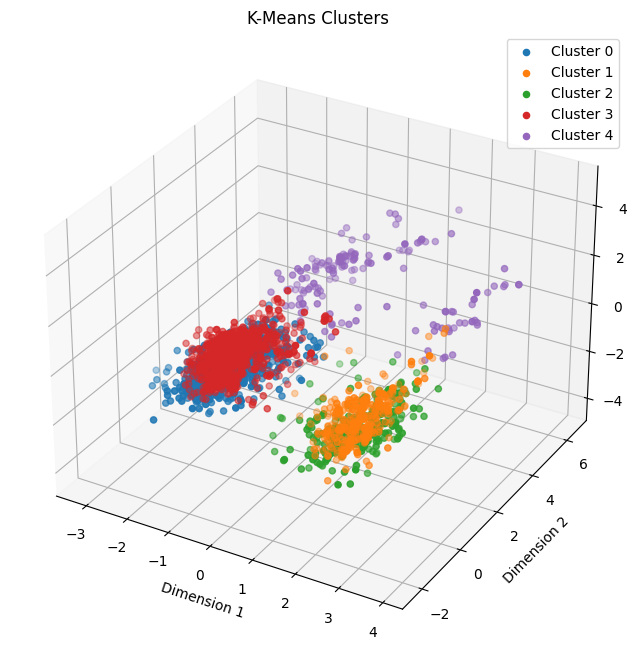

In [ ]:
# Plot individual clusters

fig = plt.figure(figsize=(10, 8))  # Adjust the figsize as needed
ax = fig.add_subplot(111, projection='3d')

for k in range(len(k_means.cluster_centers_)):
    filtered_data = df_dim_red[labels == k]
    ax.scatter(filtered_data[:, 0], filtered_data[:, 1], filtered_data[:, 2], label=f'Cluster {k}')

ax.set_title('K-Means Clusters')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.legend()

plt.show()


In [ ]:
try:
    import dash
    import dash_core_components as dcc
    import dash_html_components as html
    import plotly
    print("dash is already installed.")
except ImportError:
    !pip install dash dash-core-components dash-html-components plotly
    print("dash is not installed. Installing now...")
    !pip install dash dash-core-components dash-html-components plotly
    print("Dash installation complete.")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 13.5 MB/s eta 0:00:00
dash is not installed. Installing now...
Dash installation complete.


In [ ]:

import plotly.graph_objects as go
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [ ]:
app = dash.Dash(__name__)

# Create the 3D scatter plot using Plotly
fig = go.Figure()

for k in range(len(k_means.cluster_centers_)):
    filtered_data = df_dim_red[labels == k]
    fig.add_trace(go.Scatter3d(
        x=filtered_data[:, 0],
        y=filtered_data[:, 1],
        z=filtered_data[:, 2],
        mode='markers',
        name=f'Cluster {k}'
    ))

fig.update_layout(
    title='K-Means Clusters',
    scene=dict(
        xaxis_title='Dimension 1',
        yaxis_title='Dimension 2',
        zaxis_title='Dimension 3'
    ),
    legend=dict(
        x=0,
        y=1,
        traceorder='normal'
    )
)

# Define the layout of the Dash application
app.layout = html.Div(children=[
    html.H1(children='K-Means Clusters'),
    dcc.Graph(
        id='3d-scatter-plot',
        figure=fig,
        style={'width': '100%', 'height': '100vh'}  # Adjust the width and height
    )
])

# Run the Dash application
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
df_5 = df_2.copy()
df_5.head()

,cod_eve,año,edad_,nacionali_,sexo_,area_,ocupacion_,tip_ss_,cod_ase_,per_etn_,estrato_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_indigen,gp_pobicbf,gp_mad_com,gp_desmovi,gp_psiquia,gp_vic_vio,gp_otros,tip_cas_,pac_hos_,con_fin_,ajuste_,nom_eve,ndep_resi,nmun_resi
0,155,2020,61.0,170.0,F,3.0,99999.04,C,EPS002,6.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,7,CÁNCER DE LA MAMA Y CUELLO UTERINO,ANTIOQUIA,GUARNE
1,155,2020,57.0,170.0,F,2.0,99999.04,C,EPS037,6.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,6,CÁNCER DE LA MAMA Y CUELLO UTERINO,ANTIOQUIA,GUARNE
2,813,2020,27.0,170.0,F,3.0,99999.01,S,EPS001,6.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,1.0,6,TUBERCULOSIS,ANTIOQUIA,GUARNE
3,155,2020,62.0,170.0,F,2.0,96220.00,C,EPS010,6.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,6,CÁNCER DE LA MAMA Y CUELLO UTERINO,ANTIOQUIA,GUARNE
4,155,2020,36.0,170.0,F,1.0,99999.04,S,EPSS40,6.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,7,CÁNCER DE LA MAMA Y CUELLO UTERINO,ANTIOQUIA,GUARNE


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2723 entries, 0 to 2722
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cod_eve     2723 non-null   int64  
 1   año         2723 non-null   int64  
 2   edad_       2723 non-null   float64
 3   nacionali_  2723 non-null   float64
 4   sexo_       2723 non-null   object 
 5   area_       2723 non-null   float64
 6   ocupacion_  2723 non-null   float64
 7   tip_ss_     2723 non-null   object 
 8   cod_ase_    2723 non-null   object 
 9   per_etn_    2723 non-null   float64
 10  estrato_    2723 non-null   float64
 11  gp_discapa  2723 non-null   float64
 12  gp_desplaz  2723 non-null   float64
 13  gp_migrant  2723 non-null   float64
 14  gp_carcela  2723 non-null   float64
 15  gp_gestan   2723 non-null   float64
 16  gp_indigen  2723 non-null   float64
 17  gp_pobicbf  2723 non-null   float64
 18  gp_mad_com  2723 non-null   float64
 19  gp_desmovi  2723 non-null  

In [ ]:
import pandas as pd

# Assuming 'df_5' is your DataFrame and 'edad_' is the column you want to segment
# Define your custom age ranges
age_ranges = [0, 5, 15, 30, 40, 50, 60, float('inf')]  # Define your desired age ranges

# Define labels for the age ranges
age_labels = ['0-4', '5-15', '16-29', '30-39', '40-49', '50-59', '60+']

# Create a new column 'age_group' with the age range labels
df_5['age_group'] = pd.cut(df_5['edad_'], bins=age_ranges, labels=age_labels, include_lowest=True)

# Now, your DataFrame 'df_' has a new column 'age_group' with the specified age ranges.
df_5.drop('edad_', axis=1, inplace=True)

df_5.head()

,cod_eve,año,nacionali_,sexo_,area_,ocupacion_,tip_ss_,cod_ase_,per_etn_,estrato_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_indigen,gp_pobicbf,gp_mad_com,gp_desmovi,gp_psiquia,gp_vic_vio,gp_otros,tip_cas_,pac_hos_,con_fin_,ajuste_,nom_eve,ndep_resi,nmun_resi,age_group
0,155,2020,170.0,F,3.0,99999.04,C,EPS002,6.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,7,CÁNCER DE LA MAMA Y CUELLO UTERINO,ANTIOQUIA,GUARNE,60+
1,155,2020,170.0,F,2.0,99999.04,C,EPS037,6.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,6,CÁNCER DE LA MAMA Y CUELLO UTERINO,ANTIOQUIA,GUARNE,50-59
2,813,2020,170.0,F,3.0,99999.01,S,EPS001,6.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,1.0,6,TUBERCULOSIS,ANTIOQUIA,GUARNE,16-29
3,155,2020,170.0,F,2.0,96220.00,C,EPS010,6.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,6,CÁNCER DE LA MAMA Y CUELLO UTERINO,ANTIOQUIA,GUARNE,60+
4,155,2020,170.0,F,1.0,99999.04,S,EPSS40,6.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,7,CÁNCER DE LA MAMA Y CUELLO UTERINO,ANTIOQUIA,GUARNE,30-39


In [ ]:
# Add the labels to the dataframe
df_5['Clus_km'] = labels

CARACTERIZACIÓN DE LOS CLUSTERS

In [ ]:
df_caract = df_5.groupby('Clus_km').mean()
df_caract

,cod_eve,año,edad_,nacionali_,sexo_,area_,ocupacion_,tip_ss_,cod_ase_,estrato_,gp_gestan,pac_hos_,con_fin_,ajuste_,nmun_resi
Clus_km,,,,,,,,,,,,,,,
0,527.974110,2023.011866,32.469256,209.687163,0.353830,2.398058,87627.684455,0.193096,12.320388,2.349515,2.000000,1.923409,1.001079,0.183387,12.492988
1,512.660057,2023.019830,33.798867,211.167139,0.348442,2.481586,93276.996969,4.898017,32.934844,2.062323,1.991501,1.878187,1.014164,0.223796,12.096317
2,511.060241,2022.578313,27.054217,365.795181,0.006024,2.331325,78094.288554,1.578313,16.590361,2.475904,1.150602,1.144578,1.114458,2.427711,12.048193
3,349.211597,2022.134283,32.590031,184.386572,0.516785,1.886063,70109.861129,0.170905,12.213632,2.876907,2.000000,1.603255,1.005086,1.645982,12.440488
4,364.731293,2022.139456,31.877551,193.537415,0.571429,2.040816,76433.255612,4.874150,32.605442,2.591837,2.000000,1.414966,1.013605,1.680272,12.585034


In [ ]:
# Filter columns with object data type
object_columns = df_5

# Iterate over object columns
for col in object_columns:
    # Skip the 'Clus_km' column
    if col == 'Clus_km':
        continue

    # Group by 'Clus_km' and count unique values in each group
    counts = df_5.groupby('Clus_km')[col].nunique()

    # Print the counts for each group
    print(f"Unique values counts for column '{col}':")
    print(counts)
    print()

Unique values counts for column 'cod_eve':
Clus_km
0    33
1    28
2    29
3    25
4    17
Name: cod_eve, dtype: int64

Unique values counts for column 'año':
Clus_km
0    6
1    5
2    5
3    5
4    4
Name: año, dtype: int64

Unique values counts for column 'nacionali_':
Clus_km
0    7
1    2
2    2
3    5
4    3
Name: nacionali_, dtype: int64

Unique values counts for column 'sexo_':
Clus_km
0    2
1    2
2    2
3    2
4    2
Name: sexo_, dtype: int64

Unique values counts for column 'area_':
Clus_km
0    3
1    3
2    3
3    3
4    3
Name: area_, dtype: int64

Unique values counts for column 'ocupacion_':
Clus_km
0    104
1     31
2     27
3     98
4     39
Name: ocupacion_, dtype: int64

Unique values counts for column 'tip_ss_':
Clus_km
0    4
1    5
2    5
3    4
4    4
Name: tip_ss_, dtype: int64

Unique values counts for column 'cod_ase_':
Clus_km
0    19
1    21
2    22
3    15
4    15
Name: cod_ase_, dtype: int64

Unique values counts for column 'per_etn_':
Clus_km
0    2
1  

In [ ]:
# Iterate over each object column
for col in df_5.columns:
    # Group by 'Clus_km' and count the number of unique values for each group
    counts_per_group = df_5.groupby('Clus_km')[col].value_counts().unstack(fill_value=0)

    # Print the counts for each group
    print(f"Counts of unique values for column '{col}':")
    print(counts_per_group)
    print()

Counts of unique values for column 'cod_eve':
cod_eve  0    110  113  115  155  210  215  298  300  330  340  342  345  348  \
Clus_km                                                                         
0         21    5    6    6   60    7   24    0  322    2    4  129   17  167   
1          0    1    4    1   22    1    3    0  144    0    2   13    1    4   
2          0    8   12    5   15    4   11    0   67    0    3   28    5   57   
3          0    0    7    0   10    5    8    1  410    0    0   29    3    5   
4          0   18    0    0    1    0    1    0    2    0    2    2    0    5   

cod_eve  352  355  356  357  365  452  453  455  465  535  549  550  551  560  \
Clus_km                                                                         
0          1    9   74    4   19    3    0   10    1    3    6    0    0    1   
1          0    0   15    0    2    1    0    1    4    0    0    1    0    1   
2          0    0   19    0    5    2    1    1    2    3    4

ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.base.Index'> was passed

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Define a figure for the subplots
fig, axes = plt.subplots(len (df_5.columns)( 1, figsize=(12, 5 * len(df_5.columns))))

# Iterate over each object column
for idx, col in enumerate(df_5.columns):
    # Group by 'Clus_km' and count the number of unique values for each group
    counts_per_group = df_5.groupby('Clus_km')[col].value_counts().unstack(fill_value=0)

    # Normalize to get percentages
    percentages_per_group = counts_per_group.div(counts_per_group.sum(axis=1), axis=0) * 100

    # Plot percentages as bar plots
    percentages_per_group.plot(kind='bar', stacked=True, ax=axes[idx])
    axes[idx].set_xlabel('Grupos')
    axes[idx].set_ylabel('Porcentaje')
    axes[idx].set_title(f'Porcentaje de valores por \'{col}\'')

    # Place the legend outside the plot area
    axes[idx].legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()

TypeError: 'int' object is not callable

ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.base.Index'> was passed

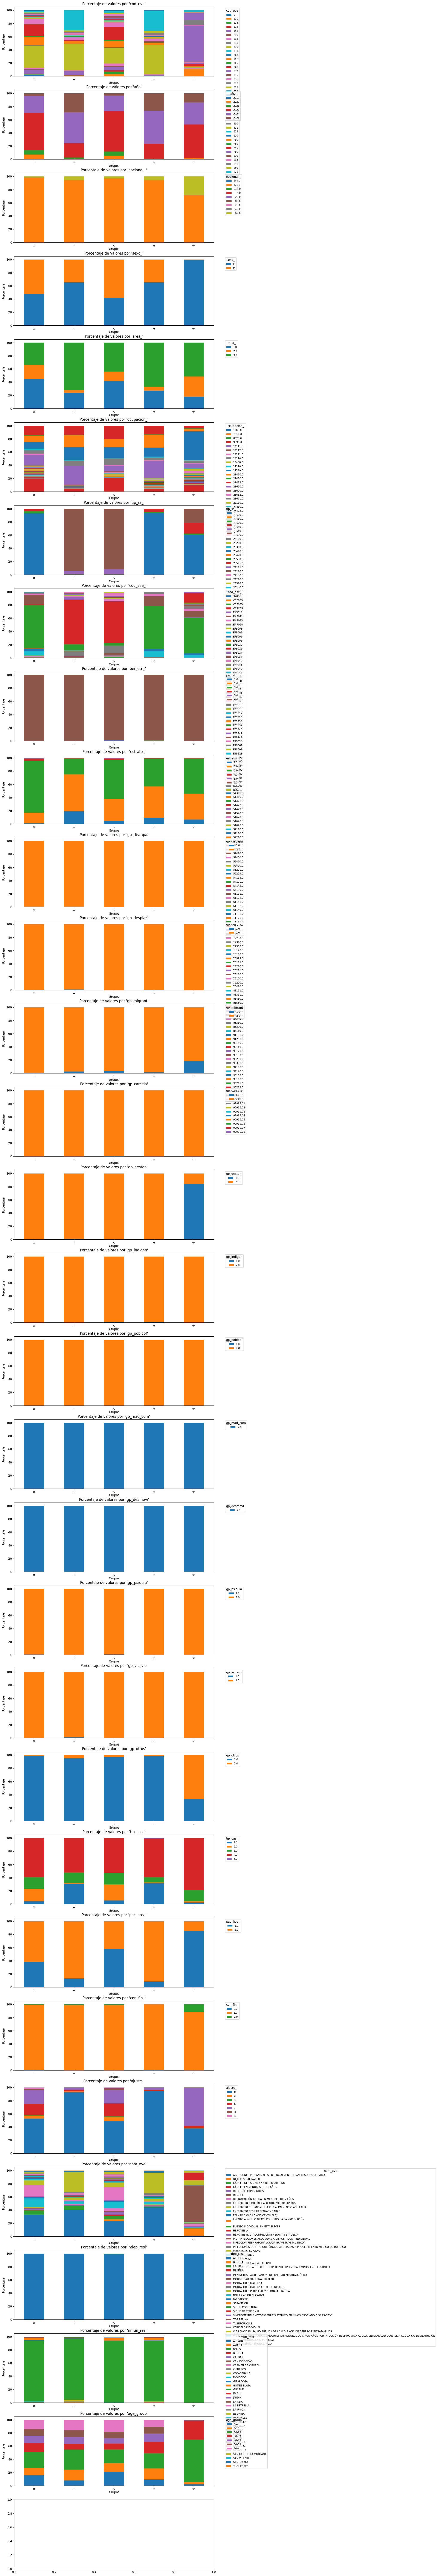

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Define a figure for the subplots
fig, axes = plt.subplots(len(df_5.columns), 1, figsize=(12, 5 * len(df_5.columns)))  # Correct the syntax here

# Iterate over each object column
for idx, col in enumerate(df_5.columns):
    # Group by 'Clus_km' and count the number of unique values for each group
    counts_per_group = df_5.groupby('Clus_km')[col].value_counts().unstack(fill_value=0)

    # Normalize to get percentages
    percentages_per_group = counts_per_group.div(counts_per_group.sum(axis=1), axis=0) * 100

    # Plot percentages as bar plots
    percentages_per_group.plot(kind='bar', stacked=True, ax=axes[idx])
    axes[idx].set_xlabel('Grupos')
    axes[idx].set_ylabel('Porcentaje')
    axes[idx].set_title(f'Porcentaje de valores por \'{col}\'')

    # Place the legend outside the plot area
    axes[idx].legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()

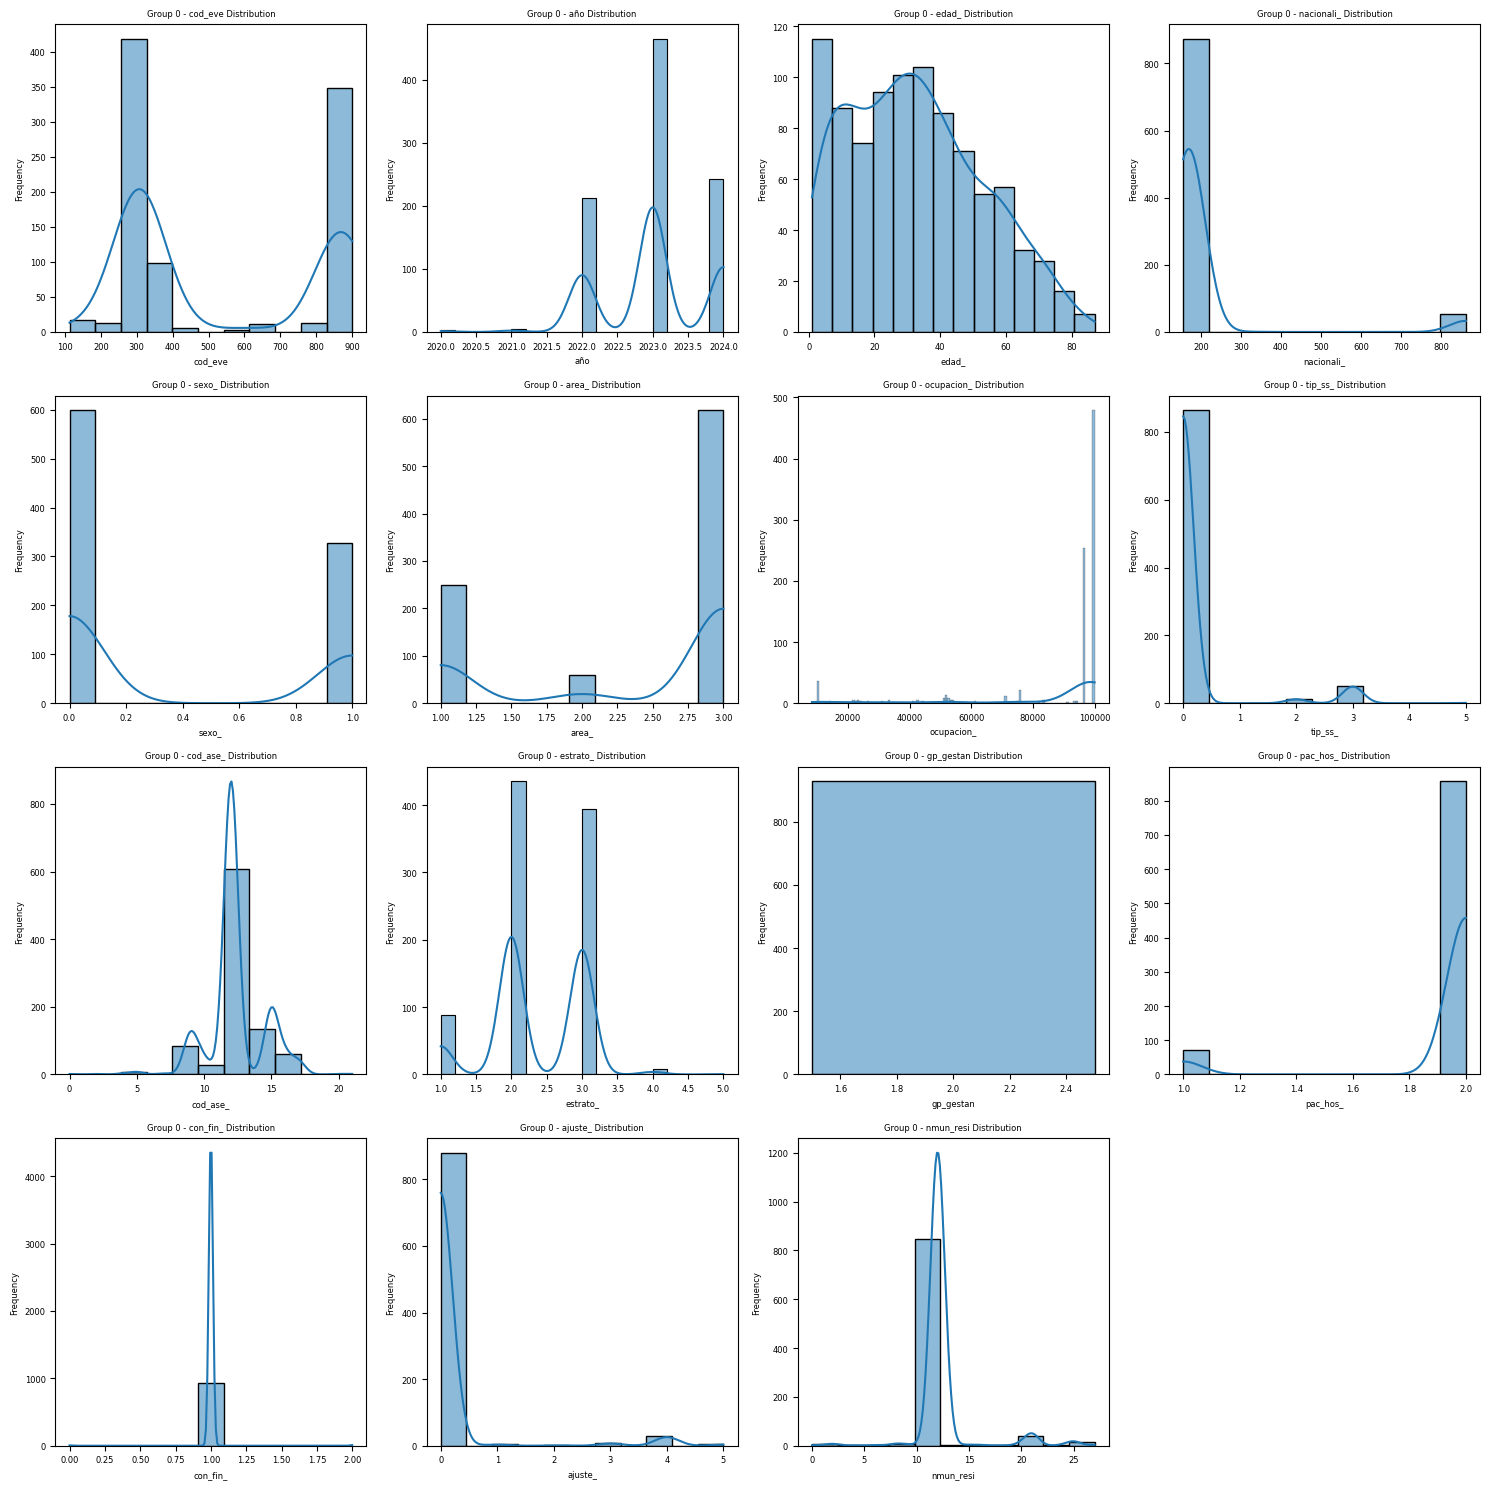

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Assuming df is your DataFrame and 'Clus_km' is the column for grouping
grouped = df.groupby('Clus_km')
num_cols = len(df.columns) - 1  # Exclude the last column

# Number of rows and columns for the subplots
num_rows = 4
num_columns = math.ceil(num_cols / num_rows)

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 15))

# Reduce the font size for x and y-axis labels
ticks_fontsize = 6

# Iterate over the groups and columns
for name, group in grouped:
    if name == 0:  # Only process group 0
        for idx, col in enumerate(group.columns[:-1]):  # Exclude the last column
            row = idx // num_columns
            column = idx % num_columns
            sns.histplot(group[col], kde=True, ax=axes[row, column])
            axes[row, column].set_title(f"Group {name} - {col} Distribution", fontsize=6)  # Title font size

            # Set the x and y-axis label font size
            axes[row, column].set_xlabel(col, fontsize=ticks_fontsize)
            axes[row, column].set_ylabel('Frequency', fontsize=ticks_fontsize)

            # Reduce the font size of x and y-axis tick labels
            axes[row, column].tick_params(axis='x', labelsize=ticks_fontsize)
            axes[row, column].tick_params(axis='y', labelsize=ticks_fontsize)

# Hide any unused subplots
for idx in range(num_cols, num_rows * num_columns):
    fig.delaxes(axes.flatten()[idx])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()





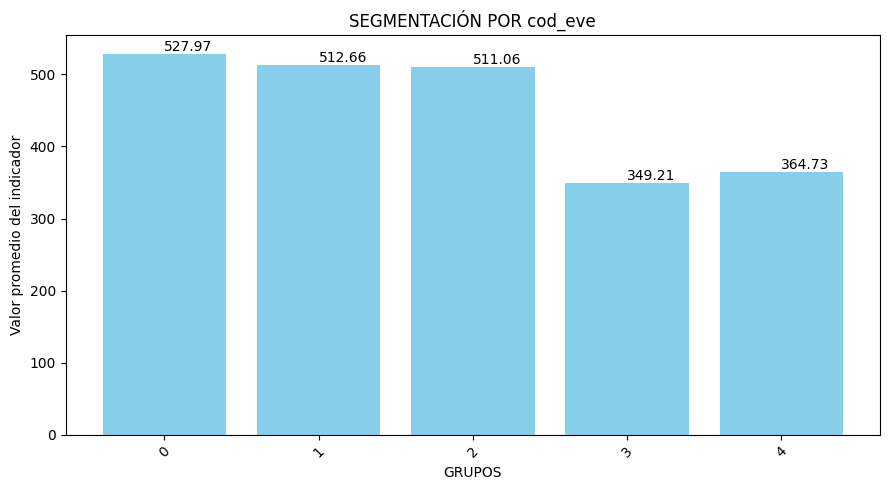

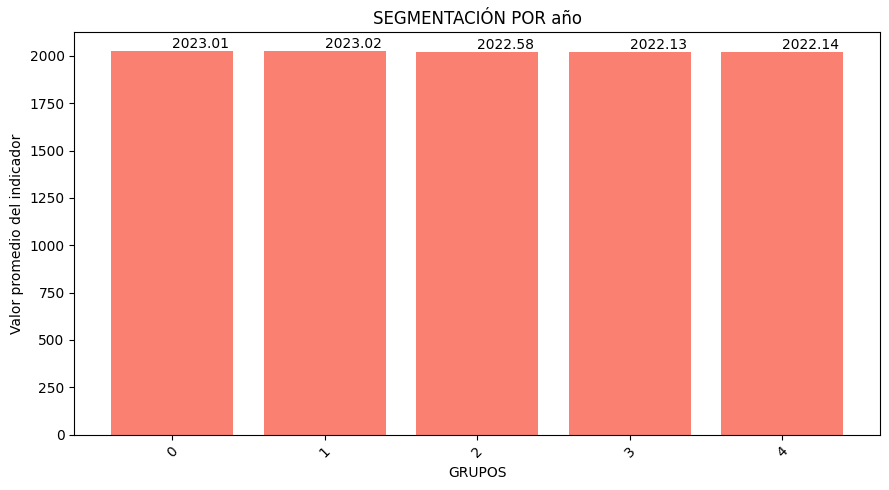

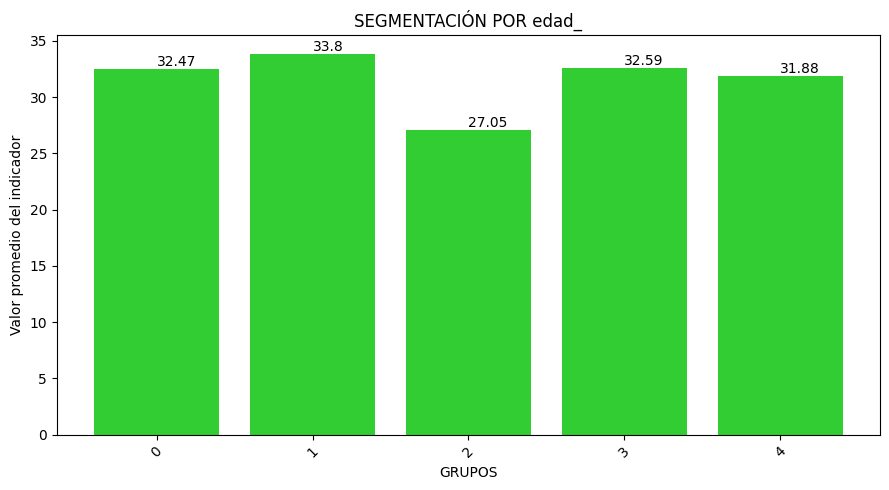

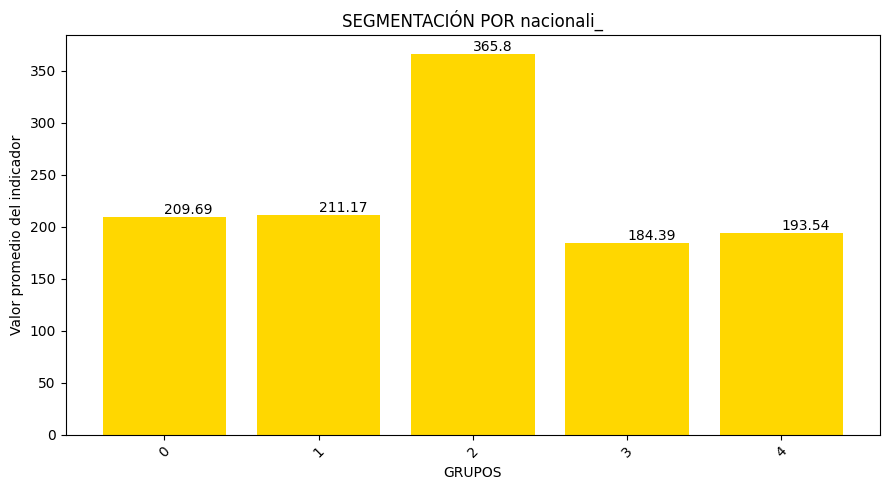

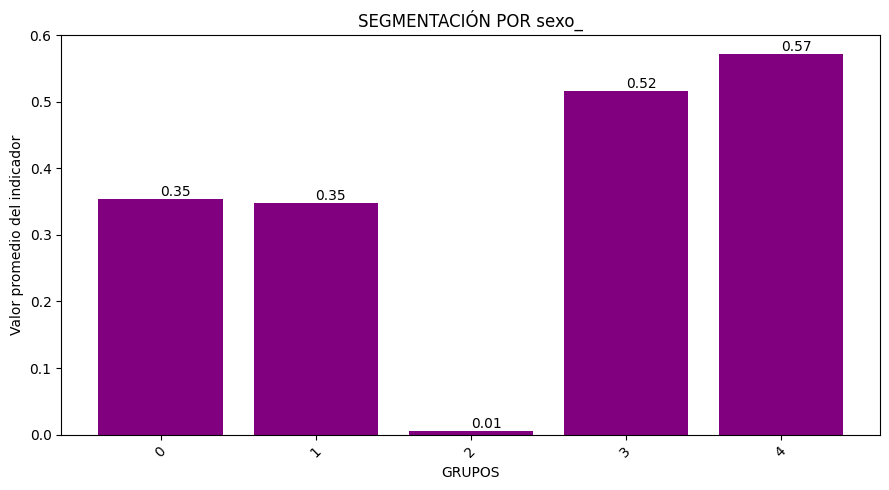

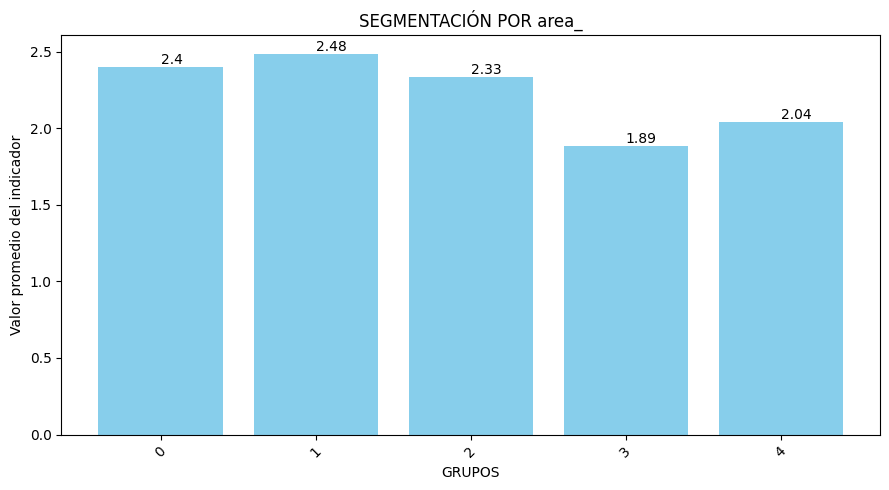

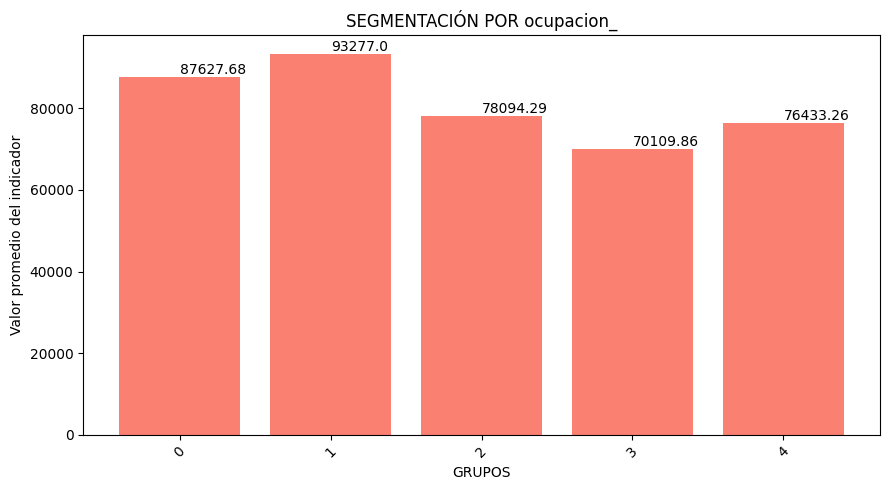

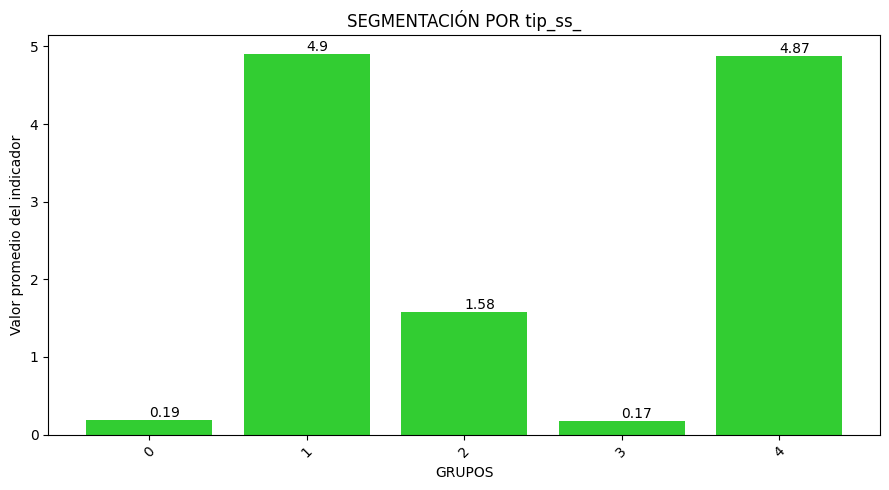

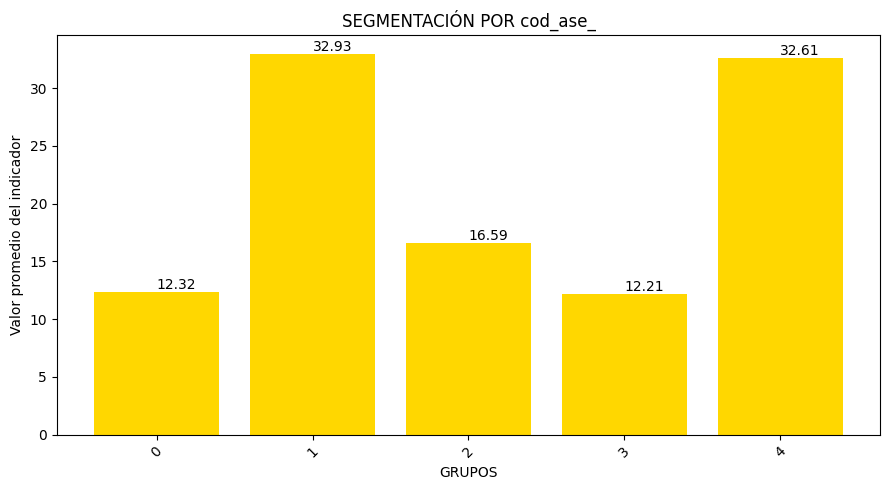

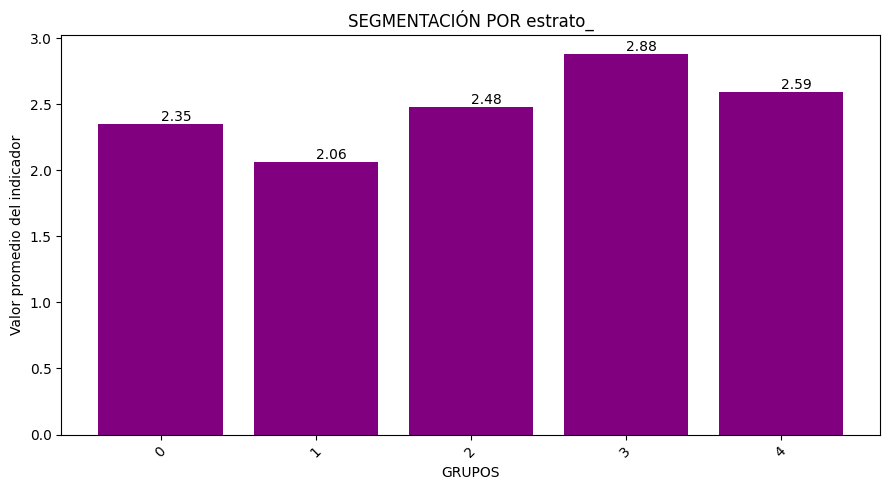

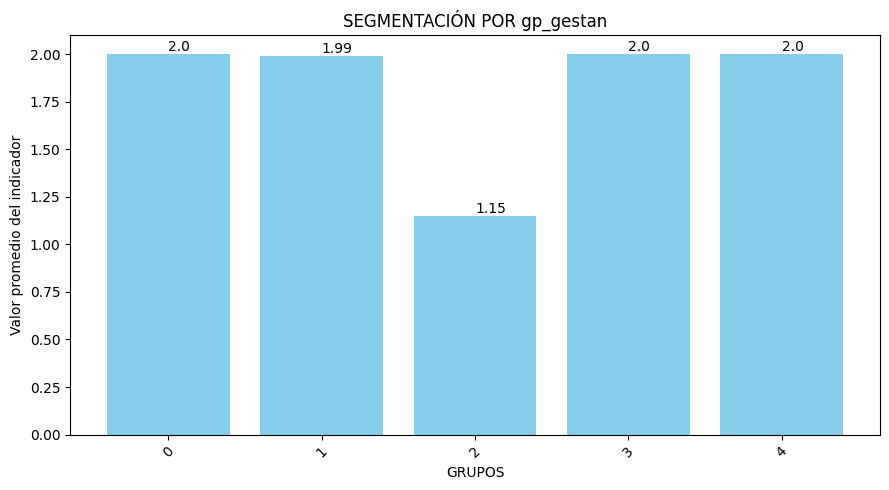

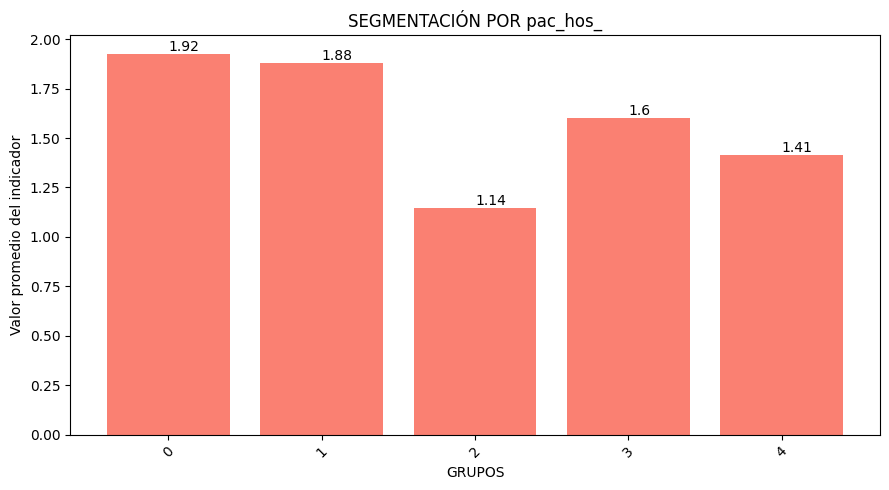

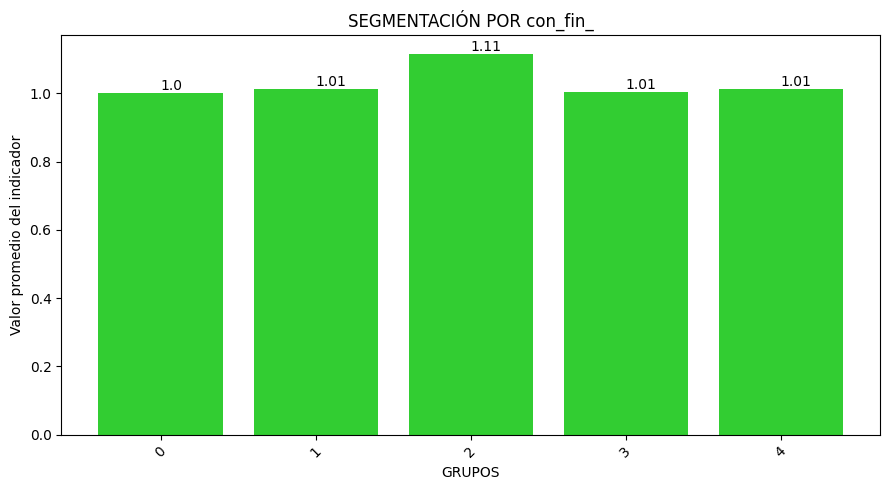

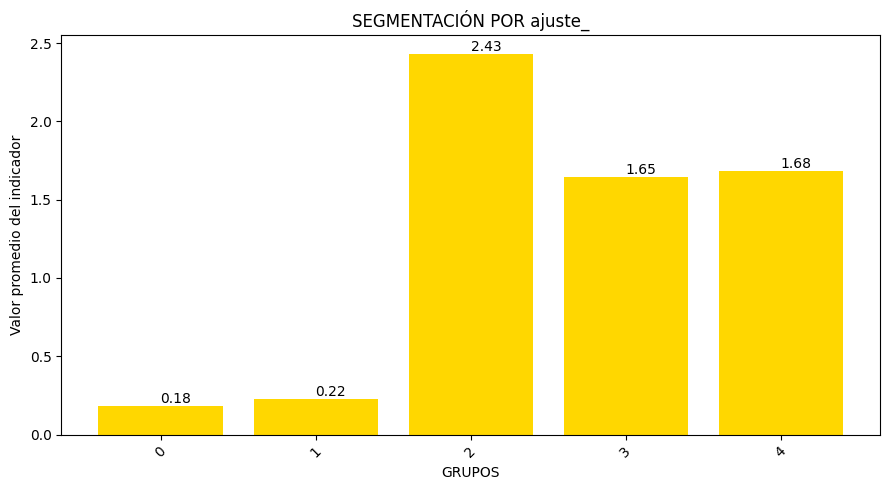

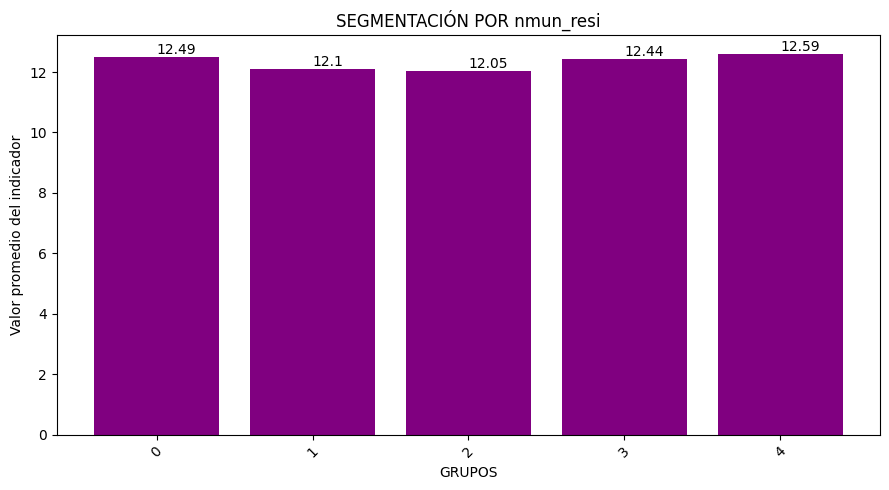

In [ ]:
import matplotlib.pyplot as plt

# Example color palette (customize as needed)
color_palette = ['skyblue', 'salmon', 'limegreen', 'gold', 'purple']

# Iterate through each column of the DataFrame
for i, column in enumerate(df_caract.columns):
    plt.figure(figsize=(9, 5))  # Adjust figure size as needed

    # Create a bar plot for the current column with specified color
    bars = plt.bar(df_caract.index, df_caract[column], color=color_palette[i % len(color_palette)])

    # Set plot title and labels
    plt.title(f'SEGMENTACIÓN POR {column}')
    plt.xlabel('GRUPOS')
    plt.ylabel('Valor promedio del indicador')

    # Rotate x-axis labels for better visibility if needed
    plt.xticks(rotation=45)

    # Annotate each bar with its value
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')

    # Show the plot
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd

# Assuming 'df_' is your DataFrame and 'edad_' is the column you want to segment
# Define your custom age ranges
age_ranges = [0, 5, 15, 30, 40, 50, 60, float('inf')]  # Define your desired age ranges

# Define labels for the age ranges
age_labels = ['0-4', '5-15', '16-29', '30-39', '40-49', '50-59', '60+']

# Create a new column 'age_group' with the age range labels
df['age_group'] = pd.cut(df['edad_'], bins=age_ranges, labels=age_labels, include_lowest=True)

# Now, your DataFrame 'df_' has a new column 'age_group' with the specified age ranges.

df[['edad_', 'age_group']]


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_ = freq_table_eda

# Sort the DataFrame by the "Percentage" column in descending order
df_ = df_.sort_values(by="Percentage", ascending=False)

# Set the size of the figure
plt.figure(figsize=(6, 4))  # Adjust the width and height as needed

# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create a distribution plot with the sorted DataFrame
sns.barplot(x="age_group", y="Percentage", data=df_, order=df_["age_group"])

# Set labels and title
plt.xlabel("Segmentos de Edad")
plt.ylabel("Frequencia %")
plt.title("Distribucion de Segmentos de Edad")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_ = freq_table_co_selected

# Sort the DataFrame by the "Percentage" column in descending order
df_ = df_.sort_values(by="Percentage", ascending=False)

# Set the size of the figure
plt.figure(figsize=(6, 4))  # Adjust the width and height as needed

# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create a distribution plot with the sorted DataFrame
sns.barplot(x="cod_eve", y="Percentage", data=df_, order=df_["cod_eve"])

# Set labels and title
plt.xlabel("Códigos de Evento")
plt.ylabel("Frequencia %")
plt.title("Distribucion de 10 Eventos de Mayor Frecuencia")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [ ]:
df['año'].value_counts()

In [ ]:
import matplotlib.pyplot as plt

# Get the value counts for the 'area_' column
año_counts = df['año'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
año_counts.plot(kind='bar')
plt.title('Value Counts of año')
plt.xlabel('Año')
plt.ylabel('Número de casos')
plt.show()


In [ ]:
df['nombre_nacionalidad'].value_counts()

In [ ]:
# Get the value counts for the 'area_' column
pais_counts = df['nombre_nacionalidad'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 4))
pais_counts.plot(kind='bar')
plt.title('Número de casos atendidos por país')
plt.xlabel('País')
plt.ylabel('Número de casos')
plt.show()

In [ ]:
df['sexo_'].value_counts()

In [ ]:
# Get the value counts for the 'area_' column
sexo_counts = df['sexo_'].value_counts()
# Create a bar plot
plt.figure(figsize=(7, 4))
sexo_counts.plot(kind='bar')
plt.title('Casos atendidos por sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de casos')
plt.show()

In [ ]:
df['area_'].value_counts()

In [ ]:
import matplotlib.pyplot as plt

# Get the value counts for the 'area_' column
area_counts = df['area_'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 4))
area_counts.plot(kind='bar')
plt.title('Casos Atendidos por Área')
plt.xlabel('Área')
plt.ylabel('Número')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# 1: cabecera municipal, 2: centro poblado, 3: rural disperso
# Get the value counts for the 'area_' column
area_counts = df['area_'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of area_')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [ ]:
!pip install seaborn


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the histplot
sns.histplot(df['ocupacion_'], kde=True)  # Replace 'df' and 'ocupacion_' with your data
plt.xlabel('Ocupacion')
plt.ylabel('Frequency')
plt.title('Distribution of Ocupacion')

# Add labels to the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()




In [ ]:
# Set the option to display all rows
pd.set_option('display.max_rows', None)
print(df['ocupacion_'].value_counts())
# Reset the display option to the default setting
pd.reset_option('display.max_rows')

In [ ]:
# Get the value counts for the 'ocupacion_' column
ocup_counts = df['ocupacion_'].value_counts()
# Create a bar plot
plt.figure(figsize=(7, 4))
ocup_counts.plot(kind='bar')
plt.title('Casos atendidos por ocupación')
plt.xlabel('Ocupación')
plt.ylabel('Número de casos')
plt.show()

In [ ]:
df['tip_ss_'].value_counts()

In [ ]:
# C = Contributivo S = Subsidiado, P = Excepción E = Especial N = No Asegurado I = Indeterminado/Pendiente
# Get the value counts for the 'ocupacion_' column
ss_counts = df['tip_ss_'].value_counts()
# Create a bar plot
plt.figure(figsize=(7, 4))
ss_counts.plot(kind='bar')
plt.title('Casos atendidos por tipo de Seguridad Social')
plt.xlabel('Tipo de Seguridad Social')
plt.ylabel('Número de casos')
plt.show()

In [ ]:
df['per_etn_'].value_counts()

In [ ]:
# 1 = Indígena, 2 = ROM Gitano 3 = Raizal, 4 = Palenquero, 5 = Negro, Mulato, AfroColombiano, 6 = Otro
# Get the value counts for the 'ocupacion_' column
etn_counts = df['per_etn_'].value_counts()
# Create a bar plot
plt.figure(figsize=(7, 4))
etn_counts.plot(kind='bar')
plt.title('Casos Atendidos por Etnia')
plt.xlabel('Etnia')
plt.ylabel('Número de casos')
plt.show()

In [ ]:
df['tip_cas_'].value_counts()

In [ ]:
# 1 = Sospechoso 2 = Probable 3 = Confirmado por Laboratorio 4 = Confirmado por Clínica 5 = Confirmado por Nexo Epidemiológico
# Get the value counts for the 'ocupacion_' column
tipo_counts = df['tip_cas_'].value_counts()
# Create a bar plot
plt.figure(figsize=(7, 4))
tipo_counts.plot(kind='pie')
plt.title('Personas atendidas por Tipo de Caso')
plt.xlabel('Tipo de Caso')
plt.ylabel('Número de Personas')
plt.show()

In [ ]:
df['estrato_'].value_counts()

In [ ]:
# Get the value counts for the 'ocupacion_' column
est_counts = df['estrato_'].value_counts()
# Create a bar plot
plt.figure(figsize=(7, 4))
est_counts.plot(kind='bar')
plt.title('Personas Atendidas por Estrato')
plt.xlabel('Estrato')
plt.ylabel('Número de Personas')
plt.show()

In [ ]:
df['gp_migrant'].value_counts()

In [ ]:
# Get the value counts for the 'ocupacion_' column
mig_counts = df['gp_migrant'].value_counts()
# Create a bar plot
plt.figure(figsize=(7, 4))
mig_counts.plot(kind='bar')
plt.title('Personas atendidas por Migrante SÍ/NO')
plt.xlabel('Migrante SÍ: 1, NO: 2')
plt.ylabel('Número de Personas Migrantes Atendidas')
plt.show()

In [ ]:
df['sem_ges_'].value_counts()

In [ ]:
count_sum = df['sem_ges_'].value_counts().sum()
print("Sum of Value Counts for 'sem_ges_':", count_sum)


In [ ]:
df['gp_vic_vio'].value_counts()

In [ ]:
# Get the value counts for the 'ocupacion_' column
vic_counts = df['gp_vic_vio'].value_counts()
# Create a bar plot
plt.figure(figsize=(7, 4))
vic_counts.plot(kind='bar')
plt.title('Personas Víctimas de Violencia Atendidas')
plt.xlabel('Víctimas SÍ: 1, 2: NO')
plt.ylabel('Número de Personas')
plt.show()

In [ ]:
# Get the value counts for the 'ocupacion_' column
tip_counts = df['tip_cas_'].value_counts()
# Create a bar plot
plt.figure(figsize=(7, 4))
tip_counts.plot(kind='bar')
plt.title('Tipos de Caso')
plt.xlabel('Tipos de Caso')
plt.ylabel('Número de Casos')
plt.show()

In [ ]:
# Get the value counts for the 'ocupacion_' column
aju_counts = df['ajuste_'].value_counts()
# Create a bar plot
plt.figure(figsize=(6, 3))
aju_counts.plot(kind='bar')
plt.title('Tipos de Ajuste')
plt.xlabel('Tipos de Ajuste')
plt.ylabel('Número de Casos')
plt.show()

In [ ]:
df['gp_mad_com'].value_counts()


In [ ]:
df['nom_eve'].value_counts()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the desired step size (width)
step_size = 1  # Set this to the width you want

# Determine the range of your data
data_min = min(df['cod_eve'])
data_max = max(df['cod_eve'])

# Calculate the number of bins needed
num_bins = int((data_max - data_min) / step_size) + 1

# Create the histplot with the custom step size
sns.histplot(df['cod_eve'], bins=num_bins, binwidth=step_size)
plt.xlabel('Evento')
plt.ylabel('Frequency')
plt.title('Distribution of Evento')

plt.show()







In [ ]:
df['nmun_resi'].value_counts()

In [ ]:
import matplotlib.pyplot as plt
# Get the value counts for the 'ocupacion_' column
mun_counts = df['nmun_resi'].value_counts()
mun_selected = mun_counts.head(6)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_mun = mun_selected

# Sort the DataFrame by the "Percentage" column in descending order
#df_ = df_.sort_values(by="Percentage", ascending=False)

# Set the size of the figure
plt.figure(figsize=(6, 4))  # Adjust the width and height as needed

# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create a distribution plot with the sorted DataFrame
sns.barplot(x="cod_eve", y="Percentage", data=df_, order=df_["cod_eve"])

# Set labels and title
plt.xlabel("Códigos de Evento")
plt.ylabel("Frequencia")
plt.title("Distribucion de 10 Eventos de Mayor Frecuencia")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [ ]:
# Get the value counts for the 'ocupacion_' column
dep_counts = df['ndep_resi'].value_counts()
dep_selected = dep_counts.head(6)
dep_selected

In [ ]:
import matplotlib.pyplot as plt
# Get the value counts for the 'ocupacion_' column
dep_counts = df['ndep_resi'].value_counts()
dep_selected = dep_counts.head(6)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_dep = dep_selected

# Sort the DataFrame by the "Percentage" column in descending order
#df_ = df_.sort_values(by="Percentage", ascending=False)

# Set the size of the figure
plt.figure(figsize=(6, 4))  # Adjust the width and height as needed

# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create a distribution plot with the sorted DataFrame
sns.barplot(x="ndep_resi", y="Percentage", data=df_dep, order=df_dep["ndep_resi"])

# Set labels and title
plt.xlabel("Departamentos de Residencia")
plt.ylabel("Frequencia")
plt.title("Distribucion de Departamentos con Mayor Frecuencia")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [ ]:
# 1 = Sí 2 = No
# Get the value counts for the 'ocupacion_' column
hos_counts = df['pac_hos_'].value_counts()
# Create a bar plot
plt.figure(figsize=(7, 4))
hos_counts.plot(kind='bar')
plt.title('Personas atendidas Hospitalizadas')
plt.xlabel('Hospitalizadas SÍ: 1, NO: 2')
plt.ylabel('Número de Personas')
plt.show()

In [ ]:
# 0 = No sabe, no responde 1 = Vivo 2 = Muerto
# Get the value counts for the 'ocupacion_' column
fin_counts = df['con_fin_'].value_counts()
# Create a bar plot
plt.figure(figsize=(7, 4))
fin_counts.plot(kind='bar')
plt.title('Personas Fallecidas')
plt.xlabel('Fallecidas SÍ: 1, NO: 2')
plt.ylabel('Número de Personas')
plt.show()

Se hace un análisis estadístico descriptivo de cada variable, de lo cual se obtiene información previa:

- Los datos corresponden a personas atendidas durante el período 2020-2023
- El promedio de edad de las personas atendidas es de 28.7 años, con una alta dispersión, desde 1 a 104 años. El 25% de las personas es de menos de 15 años, el 50% de las personas es menor de 24 años, y el 75% de las personas es menor de 38 años.
- La mayoría de las personas pertenecen al estrato 1
- La mayoría de las personas no pertenecen a grupos especiales de población
- Existe alta dispersión en el tipo de caso
- La mayoría de la población corresponde al código de país 170, al código de departamento 6
- Más del 50% de las personas atendidas son hospitalizadas
- Más del 75% de personas atendidas no terminan en fallecimiento

In [ ]:
# Análisis estadístico previo
df.describe()

- Se atendieron 7473 casos, que corresponden a 6444 personas. La persona que más número de veces fue atendida fue atendida siete veces.
- La principal nacionalidad de las personas atendidas es Colombia: 7347 de 7471, aunque se tienen 4 tipos de nacionalidad.
- De la totalidad de los casos atendidos: 7473, la mayoría corresponde al sexo femenino: 3836, que significa el 51,3%
- Se atienden personas de 28 códigos de departamento, aunque, la mayoría de casos: 6872, corresponde a personas del departamento código 5.
- Se atienden personas de 416 centros poblados, 480 veredas y 579 barrios/veredas.
- Se atendieron personas pertenecientes a 6 tipos de régimen de seguridad social, aunque, la mayoría, el 72%, corresponde al régimen subsidiado.
- Se atendieron personas cubiertas por 65 aseguradoras; la más frecuente es ESS024, con 2873 casos, de un total de 7198.
- Las personas atendidas fueron diagnósticadas con 53 nombres de eventos, siendo el más frecuente la malaria, con 867 casos de un total de 7632.
- Los datos fueron generados por 148 unidades generadoras, siendo la más frecuente la ESE Hospital Cesar Uribe Piedrahita, con 4357 casos, de un total de 6669.
- Los principales lugares de procedencia de las personas atendidas son: país: Colombia, departamento: Antioquia, municipio: Caucasia. Aunque provienen de tres países, 28 departamentos y 123 municipios.


In [ ]:
df.describe(include=['object'])

SE identifican correlaciones importantes entre las variables: año - ocupación_, nacionali_ - gp_migrant,

In [ ]:
df.corr()

In [ ]:
import pandas as pd
# Calculate the correlation matrix
corr_matrix = df.corr()

# Filter values greater than 0.5
filtered_corr_matrix = corr_matrix[corr_matrix > 0.4]

# Display the filtered correlation matrix
print(filtered_corr_matrix)


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Assuming df is your dataframe with non-numerical variables
# You can select specific columns if needed

df_2 = df_cor #[['edad_', 'cod_eve']]

# Create a function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramer's V for all pairs of non-numerical columns
correlation_matrix = pd.DataFrame(index=df_2.columns, columns=df_2.columns, dtype=float)
for i in df_2.columns:
    for j in df_2.columns:
        if i == j:
            correlation_matrix[i][j] = 1.0
        else:
            correlation_matrix[i][j] = cramers_v(df_2[i], df_2[j])

# Display the correlation matrix
print(correlation_matrix)


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table from your DataFrame
# For example, let's assume you have a DataFrame 'df' with two categorical columns 'A' and 'B'
contingency_table = pd.crosstab(df_cor['edad_'], df_cor['cod_eve'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculate Cramer's V
n = len(df_cor)  # Total number of observations
min_dim = min(contingency_table.shape)
cramer_v = (chi2 / (n * (min_dim - 1))) ** 0.5

# Display the results
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Cramer's V:", cramer_v)


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a function to calculate Chi-squared statistic, p-value, and Cramer's V
def calculate_chi2_and_cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    cramers_v = (phi2corr / min((kcorr - 1), (rcorr - 1))) ** 0.5
    return chi2, p, cramers_v

# Calculate Chi-squared statistic, p-value, and Cramer's V for all pairs of non-numerical columns
def calculate_chi2_and_cramers_v_for_all(df_cor):
    num_cols = df_cor.select_dtypes(exclude='number').columns
    results = {}

    for i in num_cols:
        for j in num_cols:
            if i != j:
                chi2, p, cramers_v = calculate_chi2_and_cramers_v(df_cor[i], df_cor[j])
                results[(i, j)] = {'Chi-squared': chi2, 'P-value': p, "Cramer V": cramers_v}

    return results

# Example: Calculate Chi-squared statistic, p-value, and Cramer's V for all pairs of columns in your DataFrame
results = calculate_chi2_and_cramers_v_for_all(df_cor)

# Display the results
for pair, values in results.items():
    print(f"Columns: {pair[0]} and {pair[1]}")
    print(f"Chi-squared statistic: {values['Chi-squared']}")
    print(f"P-value: {values['P-value']}")
    print(f"Cramer V: {values['Cramer V']}")
    print()


In [ ]:
import matplotlib.pyplot as plt

# Assuming 'column1' and 'column2' are the column names you want to plot
column1 = df['cod_eve']
column2 = df['edad_']

plt.figure(figsize=(7, 5))  # Set the size of the plot

plt.scatter(column1, column2, c='b', marker='o')  # Create the scatter plot

plt.xlabel('Tipo de Evento')  # Set the label for the x-axis
plt.ylabel('Edad')  # Set the label for the y-axis

plt.title('Tipo de Evento Vrs Edad')  # Set the title for the plot
plt.grid(True)  # Add a grid

plt.show()  # Display the plot


In [ ]:
import matplotlib.pyplot as plt

# Assuming 'column1' and 'column2' are the column names you want to plot
column1 = df['año']
column2 = df['ocupacion_']

plt.figure(figsize=(6, 4))  # Set the size of the plot

plt.scatter(column1, column2, c='b', marker='o')  # Create the scatter plot

plt.xlabel('Año')  # Set the label for the x-axis
plt.ylabel('Ocupación')  # Set the label for the y-axis

plt.title('Año Vrs Ocupación')  # Set the title for the plot
plt.grid(True)  # Add a grid

# Set custom X-axis ticks
x_ticks = [2020, 2021, 2022, 2023]
plt.xticks(x_ticks)


plt.show()  # Display the plot

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'column1' and 'column2' are the column names you want to plot
column1 = df['area_']
column2 = df['cod_eve']

plt.figure(figsize=(7, 5))  # Set the size of the plot

plt.scatter(column1, column2, c='b', marker='o')  # Create the scatter plot

plt.xlabel('Área')  # Set the label for the x-axis
plt.ylabel('Tipo de Evento')  # Set the label for the y-axis

plt.title('Área Vrs Tipo de Evento')  # Set the title for the plot
plt.grid(True)  # Add a grid

# Set custom X-axis ticks
x_ticks = [1, 2, 3]
plt.xticks(x_ticks)


plt.show()  # Display the plot

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'column1' and 'column2' are the column names you want to plot
column1 = df['con_fin_']
column2 = df['edad_']

plt.figure(figsize=(7, 5))  # Set the size of the plot

plt.scatter(column1, column2, c='b', marker='o')  # Create the scatter plot

plt.xlabel('Condición Final')  # Set the label for the x-axis
plt.ylabel('Edad')  # Set the label for the y-axis

plt.title('Condición Final Vrs Edad')  # Set the title for the plot
plt.grid(True)  # Add a grid

# Set custom X-axis ticks
x_ticks = [1, 2]
plt.xticks(x_ticks)


plt.show()  # Display the plot

In [ ]:
import pandas as pd
import scipy.stats as stats

def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1) ** 2) / (n-1)
    kcorr = k - ((k-1) ** 2) / (n-1)
    return np.sqrt(phi2corr / (min((kcorr-1), (rcorr-1))))

# Create a contingency table
contingency_table = pd.crosstab(df_cor['sexo_'], df_cor['cod_eve'])

# Calculate Cramer's V
cramer_v = cramers_v(contingency_table)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import chi2_contingency


categorical_vars = ('cod_eve', 'sexo_', 'area_', 'tip_ss_', 'estrato_', 'gp_gestan', 'gp_otros', 'tip_cas_', 'pac_hos_', 'con_fin_', 'ajuste_')

# Create a Cramer's V matrix for multiple categorical variables
cramer_matrix = np.zeros((len(categorical_vars), len(categorical_vars)))

# Create the function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramer's V for all pairs of categorical variables
for i in range(len(categorical_vars)):
    for j in range(len(categorical_vars)):
        if i != j:
            cramer_matrix[i][j] = cramers_v(df_cor[categorical_vars[i]], df_cor[categorical_vars[j]])

# Set up the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data=cramer_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=False, square=True, xticklabels=categorical_vars, yticklabels=categorical_vars)

plt.xlabel('Categorical Variable')
plt.ylabel('Categorical Variable')
plt.title('Cramer\'s V Heatmap')

plt.show()




In [ ]:
df[["edad_", "ocupacion_", "estrato_", "gp_vic_vio", "cod_eve"]].corr()

Se pueden hacer tablas de variables agrupadas, que podrían ser de utilidad para la toma de decisiones; aquí algunas de ellas, pero se pueden hacer las que la Secretaría de Salud necesite:

In [ ]:
df['area_'].unique()

In [ ]:
df_group_one = df[['area_','tip_cas_','edad_']]

In [ ]:
# grouping results
df_group_one = df_group_one.groupby(['area_'],as_index=False).mean()
df_group_one

In [ ]:
# grouping results
df_gptest = df[['area_','tip_cas_','edad_']]
grouped_test1 = df_gptest.groupby(['area_','tip_cas_'],as_index=False).mean()
grouped_test1

In [ ]:
grouped_pivot = grouped_test1.pivot(index='area_',columns='tip_cas_')
grouped_pivot

In [ ]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

También se podrían hacer este tipo de mapas de calor con base en tres variables. Aquí se puede ver en X el tipo de caso, en Y el área, y el color representa la edad.

In [ ]:
import numpy as np
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

Este otro tipo de gráfica es útil para identificar la distribución de las unidades de análisis: pacientes, con respecto de otra variable, en este caso la edad, y agrupados los pacientes con relación a otra variable. Se tiene en la gráfica: edad máxima y mínima, la mediana, la distribución en cuartiles, y los valores atípicos. En la gráfica de abajo, los pacientes están distribuídos por área: 1, 2 y 3. Se puede apreciar que los pacientes del primer cuartil del área 1, tienen menor edad que los pacientes de las otras dos áreas: 14 años, y, además, la mediana es más baja.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a custom color palette
custom_palette = ["#FF5733", "#33FF57", "#3366FF"]  # Replace with your desired colors

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="area_", y="edad_", data=df_cor, palette=custom_palette)

# Set custom x-ticks
custom_yticks = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.yticks(ticks=custom_yticks)
plt.xlabel("Área")  # Label for the x-axis
plt.ylabel("Edad")  # Label for the y-axis
plt.title("Distribución de Área por Edad")  # Title for the plot

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a custom color palette
custom_palette = ["#FF5733", "#33FF57", "#3366FF"]  # Replace with your desired colors

# Create the box plot
plt.figure(figsize=(13, 6))
sns.boxplot(x="cod_eve", y="edad_", data=df_cor, palette=custom_palette)

# Set custom x-ticks
custom_yticks = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.yticks(ticks=custom_yticks)
plt.xlabel("Código de Evento")  # Label for the x-axis
plt.ylabel("Edad")  # Label for the y-axis
plt.title("Distribución de Evento por Edad")  # Title for the plot

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'your_value' with the specific 'cod_ev' value you want to plot
specific_value = 465

# Filter the DataFrame for the specific 'cod_ev' value
subset_df = df[df['cod_eve'] == specific_value]

# Create a boxplot for the filtered data
sns.boxplot(x="cod_eve", y="edad_", data=subset_df)

# Add labels and title
plt.xlabel("Evento")
plt.ylabel("Edad")
plt.title(f'Boxplot for cod_ev = {specific_value}')

# Show the plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a custom color palette
custom_palette = ["#FF5733", "#33FF57", "#3366FF"]  # Replace with your desired colors

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="estrato_", y="edad_", data=df_cor, palette=custom_palette)

# Set custom x-ticks
custom_yticks = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.yticks(ticks=custom_yticks)
plt.xlabel("Estrato")  # Label for the x-axis
plt.ylabel("Edad")  # Label for the y-axis
plt.title("Distribución de Personas/Estrato por Edad")  # Title for the plot

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a custom color palette
custom_palette = ["#FF5733", "#33FF57", "#3366FF"]  # Replace with your desired colors

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="tip_cas_", y="edad_", data=df_cor, palette=custom_palette)

# Set custom x-ticks
custom_yticks = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.yticks(ticks=custom_yticks)
plt.xlabel("Tipo de Caso")  # Label for the x-axis
plt.ylabel("Edad")  # Label for the y-axis
plt.title("Distribución de Tipos de Caso por Edad")  # Title for the plot

plt.show()

In [ ]:
#sns.boxplot(x="tip_ss_", y="edad_", data=df)
import seaborn as sns
import matplotlib.pyplot as plt

# Create a custom color palette
custom_palette = ["#FF5733", "#33FF57", "#3366FF"]  # Replace with your desired colors

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="tip_ss_", y="edad_", data=df_cor, palette=custom_palette)

# Set custom x-ticks
custom_yticks = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.yticks(ticks=custom_yticks)
plt.xlabel("Tipo de Seguridad Social")  # Label for the x-axis
plt.ylabel("Edad")  # Label for the y-axis
plt.title("Distribución de Personas/Tipo de Seguridad Social por Edad")  # Title for the plot

plt.show()

In [ ]:
sns.boxplot(x="nombre_nacionalidad", y="edad_", data=df)

In [ ]:
#sns.boxplot(x="sexo_", y="edad_", data=df)
import seaborn as sns
import matplotlib.pyplot as plt

# Create a custom color palette
custom_palette = ["#FF5733", "#33FF57", "#3366FF"]  # Replace with your desired colors

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="sexo_", y="edad_", data=df_cor, palette=custom_palette)

# Set custom x-ticks
custom_yticks = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.yticks(ticks=custom_yticks)
plt.xlabel("Sexo")  # Label for the x-axis
plt.ylabel("Edad")  # Label for the y-axis
plt.title("Distribución de Personas/Sexo por Edad")  # Title for the plot

plt.show()

In [ ]:
#sns.boxplot(x="gp_psiquia", y="edad_", data=df)
import seaborn as sns
import matplotlib.pyplot as plt

# Create a custom color palette
custom_palette = ["#FF5733", "#33FF57", "#3366FF"]  # Replace with your desired colors

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="gp_psiquia", y="edad_", data=df_cor, palette=custom_palette)

# Set custom x-ticks
custom_yticks = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.yticks(ticks=custom_yticks)
plt.xlabel("Grupo de Personas de SÍ Psiquiatría - NO ")  # Label for the x-axis
plt.ylabel("Edad")  # Label for the y-axis
plt.title("Distribución de Personas por Psiquiatría SÍ - NO")  # Title for the plot

plt.show()


In [ ]:
sns.boxplot(x="gp_vic_vio", y="edad_", data=df)

In [ ]:
sns.boxplot(x="gp_indigen", y="edad_", data=df)

Otro análisis que se puede hacer es Análisis de Varianza ANOVA. Este análisis se utiliza para determinar si existe una diferencia estadísticamente significativa entre los grupos de pacientes: Mujeres y Hombres, con respecto de la variable edad. En este caso, se encontró que sí existe una diferencia estadísticamente significativa, entre pacientes hombres y mujeres, en el set de datos analizados.

In [ ]:
df_gptest = df[['sexo_','tip_cas_','edad_']]

In [ ]:
grouped_test2=df_gptest[['sexo_', 'edad_']].groupby(['sexo_'])
grouped_test2.head(10)

In [ ]:
grouped_test3=df_gptest[['tip_cas_', 'edad_']].groupby(['tip_cas_'])
grouped_test3.head(2)

In [ ]:
df_gptest

In [ ]:
grouped_test2.get_group('F')['edad_']

In [ ]:
grouped_test3.get_group(5)['edad_']

In [ ]:
from scipy import stats

In [ ]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('F')['edad_'], grouped_test2.get_group('M')['edad_'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

SEGMENTACIÓN

In [ ]:
df_seg =df[['sexo_', 'edad_', 'area_', 'cod_eve', 'gp_gestan', 'pac_hos_', 'con_fin_']]
#df_seg =df[['num_ide_', 'sexo_', 'edad_', 'cod_eve']]
df_seg

In [ ]:
# Assuming 'sexo_' is the name of the column containing 'F' and 'M' values
#df_seg_ = pd.get_dummies(df_seg, columns=['sexo_'], prefix=['sexo_'], drop_first=True)
# Assuming 'sexo_' is the name of the column containing 'F' and 'M' values
#df_seg['sexo_'].replace({'F': 1, 'M': 2}, inplace=True)
df_seg['sexo_'] = df_seg['sexo_'].replace({'F': 1, 'M': 2})
df_seg

In [ ]:
df_seg.dtypes

In [ ]:
X = df_seg.values[:,0:]
X

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.preprocessing import StandardScaler
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

In [ ]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
k_means = KMeans()
# Set up the parameter grid to search over
param_grid = {"n_clusters": [6, 7, 8], "n_init": [4, 5], "max_iter": [5, 10, 12], "algorithm": ["auto", "full", "elkan"]}

# Set up the grid search
grid_search = GridSearchCV(k_means, param_grid=param_grid, cv=5)

# Run the grid search
grid_search.fit(X)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

In [ ]:
#clusterNum = 8
#k_means = KMeans(n_clusters = clusterNum)
#k_means.fit(X)
#labels = k_means.labels_
#print(labels)

In [ ]:
from sklearn.cluster import KMeans

# Define the best parameters obtained from the grid search
best_params = {'algorithm': 'full', 'max_iter': 5, 'n_clusters': 8, 'n_init': 4}

# Create a K-Means model with the best parameters
k_means = KMeans(**best_params)

# Fit the model to your data
k_means.fit(X)

# Get the cluster labels for each data point
labels = k_means.labels_
print(labels)


In [ ]:
df_seg["Clus_km"] = labels
df_seg.head(100)

In [ ]:
df_seg.info()

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'X', 'Y', and 'Z' are the column names in your DataFrame
plt.figure(figsize=(8, 6))
plt.scatter(df_seg['edad_'], df_seg['cod_eve'], c=df_seg['sexo_'], cmap='viridis', marker='o')
plt.xlabel('Edad')
plt.ylabel('Evento')
plt.title('Edad - Evento - Sexo')
plt.colorbar(label='sexo_')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'X', 'Y', and 'Z' are the column names in your DataFrame
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Replace 'X', 'Y', and 'Z' with the actual column names in your DataFrame
ax.scatter(df_seg['edad_'], df_seg['cod_eve'], df_seg['sexo_'], c='b', marker='o')

ax.set_xlabel('Edad')
ax.set_ylabel('Tipo de Evento')
ax.set_zlabel('Sexo')

# Define custom Z-axis ticks
z_ticks = [1, 2]  # Your custom ticks
ax.set_zticks(z_ticks)

plt.title('Edad - Tipo de Evento - Sexo')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'X', 'Y', and 'Z' are the column names in your DataFrame
fig = plt.figure(figsize=(7, 5), dpi=600)  # Increase dpi for higher quality
ax = fig.add_subplot(111, projection='3d')

# Replace 'X', 'Y', and 'Z' with the actual column names in your DataFrame
ax.scatter(df_seg['edad_'], df_seg['cod_eve'], df_seg['sexo_'], c='b', marker='o')

ax.set_xlabel('Edad')
ax.set_ylabel('Tipo de Evento')
ax.set_zlabel('Sexo')

# Define custom Z-axis ticks
z_ticks = [1, 2]  # Your custom ticks
ax.set_zticks(z_ticks)

plt.title('Edad - Tipo de Evento - Sexo')

# Save the plot with higher quality and a transparent background
plt.savefig('scatter_plot.png', dpi=300, transparent=True)

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set your desired DPI and figure size
custom_dpi = 300
custom_figsize = (7, 5)

# Set Seaborn style
sns.set(style="darkgrid")

# Create the 3D scatter plot
fig = plt.figure(figsize=custom_figsize, dpi=custom_dpi)
ax = fig.add_subplot(111, projection='3d')

# Replace 'X', 'Y', and 'Z' with your actual column names
ax.scatter(df_seg['edad_'], df_seg['cod_eve'], df_seg['sexo_'], c='b', marker='o')

ax.set_xlabel('Edad')
ax.set_ylabel('Tipo de Evento')
ax.set_zlabel('Sexo')

# Define custom Z-axis ticks
z_ticks = [1, 2]  # Your custom ticks
x_ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
ax.set_zticks(z_ticks)
ax.set_xticks(x_ticks)

plt.title('Edad - Tipo de Evento - Sexo')
plt.show()


In [ ]:
df_seg.groupby('Clus_km').mean().head(10)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_seg is your DataFrame and 'Clus_km' is the column for grouping
grouped = df_seg.groupby('Clus_km')
num_cols = len(df_seg.columns) - 1  # Exclude the last column

fig, axes = plt.subplots(len(grouped), num_cols, figsize=(15, 15))

# Reduce the font size for x and y-axis labels
ticks_fontsize = 6

for i, (name, group) in enumerate(grouped):
    for j, col in enumerate(group.columns[:-1]):  # Exclude the last column
        sns.histplot(group[col], kde=True, ax=axes[i, j])
        axes[i, j].set_title(f"Group {name} - {col} Distribution", fontsize=6)  # Title font size

        # Set the x and y-axis label font size
        axes[i, j].set_xlabel(col, fontsize=ticks_fontsize)
        axes[i, j].set_ylabel('Frequency', fontsize=ticks_fontsize)

        # Reduce the font size of x and y-axis tick labels
        axes[i, j].tick_params(axis='x', labelsize=ticks_fontsize)
        axes[i, j].tick_params(axis='y', labelsize=ticks_fontsize)

plt.tight_layout()
plt.show()




In [ ]:
# Assuming df_seg is your DataFrame and 'Clus_km' is the column for grouping
grouped = df_seg.groupby('Clus_km')
unique_value_columns = ["sexo_", "area_", "cod_eve", "gp_gestan", "pac_hos_", "con_fin_", 'edad_']

for name, group in grouped:
    print(f"\nGroup {name}:")
    for col in unique_value_columns:
        freq_table = group[col].value_counts()
        print(f"\n{col} Frequency Table:")
        print(freq_table)


In [ ]:
selected_values = df_seg.loc[df_seg['Clus_km'] == 0, 'cod_eve']
A = selected_values.to_frame()
A.head(5)

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'df' and you want to filter based on the 'column_name'
column_name = 'Clus_km'  # Replace with the actual column name
target_value = 0  # Replace with the value you want to filter

# Create a boolean mask to filter the DataFrame
mask = df_seg[column_name] == target_value

# Apply the mask to filter the DataFrame
filtered_df = df_seg[mask]

# Now 'filtered_df' contains only rows where 'column_name' matches 'target_value'
filtered_df

In [ ]:
new_df = filtered_df.iloc[:, 1:-1]
new_df

In [ ]:
import pandas as pd

# Assuming 'df_' is your DataFrame and 'edad_' is the column you want to segment
# Define your custom age ranges
age_ranges = [0, 5, 15, 30, 40, 50, 60, float('inf')]  # Define your desired age ranges

# Define labels for the age ranges
age_labels = ['0-4', '5-15', '16-29', '30-39', '40-49', '50-59', '60+']

# Create a new column 'age_group' with the age range labels
new_df['age_group'] = pd.cut(new_df['edad_'], bins=age_ranges, labels=age_labels, include_lowest=True)

# Now, your DataFrame 'df_' has a new column 'age_group' with the specified age ranges.
new_df.drop('edad_', axis=1, inplace=True)

new_df

In [ ]:
import pandas as pd
# Set the option to display all rows
pd.set_option('display.max_rows', None)

# Assuming df is your DataFrame
df_o = A
# Loop through each column in the DataFrame
for column in df_o.columns:
    # Create a frequency table for the current column
    freq_table_o = df_o[column].value_counts().reset_index()
    freq_table_o.columns = [column, 'Frequency']

    # Calculate the percentage and add it to the frequency table
    freq_table_o['Percentage'] = (freq_table_o['Frequency'] / freq_table_o['Frequency'].sum()) * 100

    # Calculate the cumulative percentage and add it to the frequency table
    freq_table_o['Cumulative Percentage'] = freq_table_o['Percentage'].cumsum()

    # Display the frequency table with the Percentage and Cumulative Percentage columns
    print(f"Frequency table for column: {column}")
    print(freq_table_o)
    print("\n")

# Reset the display option to the default setting
pd.reset_option('display.max_rows')

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'X', 'Y', and 'Z' are the column names in your DataFrame
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Replace 'X', 'Y', and 'Z' with the actual column names in your DataFrame
ax.scatter(filtered_df['edad_'], filtered_df['cod_eve'], filtered_df['sexo_'], c='b', marker='o')

ax.set_xlabel('Edad')
ax.set_ylabel('Tipo de Evento')
ax.set_zlabel('Sexo')

# Define custom Z-axis ticks
z_ticks = [1, 2]  # Your custom ticks
ax.set_zticks(z_ticks)

plt.title('Edad - Tipo de Evento - Sexo')
plt.show()

In [ ]:
selected_values_ = df_seg.loc[df_seg['Clus_km'] == 0, 'sexo_']
B = selected_values_.to_frame()
B.head(5)

In [ ]:
import pandas as pd
# Set the option to display all rows
pd.set_option('display.max_rows', None)

# Assuming df is your DataFrame
df_o = B
# Loop through each column in the DataFrame
for column in df_o.columns:
    # Create a frequency table for the current column
    freq_table_o = df_o[column].value_counts().reset_index()
    freq_table_o.columns = [column, 'Frequency']

    # Calculate the percentage and add it to the frequency table
    freq_table_o['Percentage'] = (freq_table_o['Frequency'] / freq_table_o['Frequency'].sum()) * 100

    # Calculate the cumulative percentage and add it to the frequency table
    freq_table_o['Cumulative Percentage'] = freq_table_o['Percentage'].cumsum()

    # Display the frequency table with the Percentage and Cumulative Percentage columns
    print(f"Frequency table for column: {column}")
    print(freq_table_o)
    print("\n")

# Reset the display option to the default setting
pd.reset_option('display.max_rows')

In [ ]:
selected_values_ = df_seg.loc[df_seg['Clus_km'] == 0, 'area_']
C = selected_values_.to_frame()
C.head(5)

In [ ]:
import pandas as pd
# Set the option to display all rows
pd.set_option('display.max_rows', None)

# Assuming df is your DataFrame
df_o = C
# Loop through each column in the DataFrame
for column in df_o.columns:
    # Create a frequency table for the current column
    freq_table_o = df_o[column].value_counts().reset_index()
    freq_table_o.columns = [column, 'Frequency']

    # Calculate the percentage and add it to the frequency table
    freq_table_o['Percentage'] = (freq_table_o['Frequency'] / freq_table_o['Frequency'].sum()) * 100

    # Calculate the cumulative percentage and add it to the frequency table
    freq_table_o['Cumulative Percentage'] = freq_table_o['Percentage'].cumsum()

    # Display the frequency table with the Percentage and Cumulative Percentage columns
    print(f"Frequency table for column: {column}")
    print(freq_table_o)
    print("\n")

# Reset the display option to the default setting
pd.reset_option('display.max_rows')

In [ ]:
selected_values_ = df_seg.loc[df_seg['Clus_km'] == 0, 'gp_gestan']
D = selected_values_.to_frame()
D.head(5)

In [ ]:
import pandas as pd
# Set the option to display all rows
pd.set_option('display.max_rows', None)

# Assuming df is your DataFrame
df_o = D
# Loop through each column in the DataFrame
for column in df_o.columns:
    # Create a frequency table for the current column
    freq_table_o = df_o[column].value_counts().reset_index()
    freq_table_o.columns = [column, 'Frequency']

    # Calculate the percentage and add it to the frequency table
    freq_table_o['Percentage'] = (freq_table_o['Frequency'] / freq_table_o['Frequency'].sum()) * 100

    # Calculate the cumulative percentage and add it to the frequency table
    freq_table_o['Cumulative Percentage'] = freq_table_o['Percentage'].cumsum()

    # Display the frequency table with the Percentage and Cumulative Percentage columns
    print(f"Frequency table for column: {column}")
    print(freq_table_o)
    print("\n")

# Reset the display option to the default setting
pd.reset_option('display.max_rows')

In [ ]:
selected_values_ = df_seg.loc[df_seg['Clus_km'] == 0, 'pac_hos_']
E = selected_values_.to_frame()
E.head(5)

In [ ]:
import pandas as pd
# Set the option to display all rows
pd.set_option('display.max_rows', None)

# Assuming df is your DataFrame
df_o = E
# Loop through each column in the DataFrame
for column in df_o.columns:
    # Create a frequency table for the current column
    freq_table_o = df_o[column].value_counts().reset_index()
    freq_table_o.columns = [column, 'Frequency']

    # Calculate the percentage and add it to the frequency table
    freq_table_o['Percentage'] = (freq_table_o['Frequency'] / freq_table_o['Frequency'].sum()) * 100

    # Calculate the cumulative percentage and add it to the frequency table
    freq_table_o['Cumulative Percentage'] = freq_table_o['Percentage'].cumsum()

    # Display the frequency table with the Percentage and Cumulative Percentage columns
    print(f"Frequency table for column: {column}")
    print(freq_table_o)
    print("\n")

# Reset the display option to the default setting
pd.reset_option('display.max_rows')

In [ ]:
selected_values_ = df_seg.loc[df_seg['Clus_km'] == 0, 'con_fin_']
F = selected_values_.to_frame()
F.head(5)

In [ ]:
import pandas as pd
# Set the option to display all rows
pd.set_option('display.max_rows', None)

# Assuming df is your DataFrame
df_o = F
# Loop through each column in the DataFrame
for column in df_o.columns:
    # Create a frequency table for the current column
    freq_table_o = df_o[column].value_counts().reset_index()
    freq_table_o.columns = [column, 'Frequency']

    # Calculate the percentage and add it to the frequency table
    freq_table_o['Percentage'] = (freq_table_o['Frequency'] / freq_table_o['Frequency'].sum()) * 100

    # Calculate the cumulative percentage and add it to the frequency table
    freq_table_o['Cumulative Percentage'] = freq_table_o['Percentage'].cumsum()

    # Display the frequency table with the Percentage and Cumulative Percentage columns
    print(f"Frequency table for column: {column}")
    print(freq_table_o)
    print("\n")

# Reset the display option to the default setting
pd.reset_option('display.max_rows')

In [ ]:
selected_values_ = df_seg.loc[df_seg['Clus_km'] == 0, 'edad_']
G = selected_values_.to_frame()
G.head(5)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the histplot with different elements
sns.histplot(G['edad_'], kde=True, element='step')  # Use 'step' to make bars narrower
plt.xlabel('Edad')
plt.ylabel('Frequencia')
plt.title('Distribución de Edad')

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

new_df['age_group'] = pd.to_numeric(new_df['age_group'], errors='coerce')
sns.distplot(new_df['age_group'], kde=False, ax=axs[row, col])

# Get the number of columns in your dataframe
num_columns = len(new_df.columns)

# Calculate the number of rows and columns for the subplots
nrows = num_columns // 4 + 1
ncols = min(num_columns, 4)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 5*nrows))

for i, column in enumerate(new_df.columns):
    row = i // ncols
    col = i % ncols
    sns.distplot(new_df[column], kde=False, ax=axs[row, col])
    axs[row, col].set_title(f'Distribución por {column}')

plt.tight_layout(pad=2.0)
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the number of columns in your dataframe
num_columns = len(new_df.columns)

# Calculate the number of rows and columns for the subplots
nrows = num_columns // 4 + 1
ncols = min(num_columns, 4)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 5*nrows))

for i, column in enumerate(new_df.columns):
    row = i // ncols
    col = i % ncols
    sns.countplot(x=column, data=new_df, ax=axs[row, col])
    axs[row, col].set_title(f'Distribution for {column}')
    # Rotate the x-axis labels by 90 degrees
    axs[row, col].set_xticklabels(axs[row, col].get_xticklabels(), rotation=90)
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Count')

plt.tight_layout(pad=2.0)
plt.show()


Caracterización de los grupos

- Grupo 0: Mujeres, de 24.4 años promedio de edad, atendidas principalmente por (549) Morbilidad materna extrema y (560) Mortalidad Perinatal y neonatal tardía.
- Grupo 1: Mujeres y hombres, de 22.6 años promedio de edad, atendidos por (210) dengue, (215) defectos congénitos y (220) dengue grave.
- Grupo 2: 75% mujeres, de 23.9 años promedio de edad, atendidas por (875) Vigilancia en salud pública de las violencias de género, (850) VIH/SIDA/
Mortalidad por SIDA.
- Grupo 3: 54 % hombres, de 17.8 años de edad, 300 Agresiones por animales potencialmente transmisores de rabia, 348 Infección
respiratoria aguda grave (IRAG inusitado), 345 Enfermedad
Similar a Influenza Infección Respiratoria Aguda Grave (Vigilancia centinela), 356 Intento de Suicidio, 365 Intoxicaciones por sustancias químicas, 355 Enfermedad transmitida por alimentos o agua (ETA), 352 Infecciones de sitio quirúrgico asociadas a procedimiento médico quirúrgico
- Grupo 4: 73% hombres, de 29.8 años promedio de edad, atendidos por 465 Malaria, 420 Leishmaniasis Cutánea
- Grupo 5: 81.5 % mujeres, de 25.5 años promedio de edad, atendidas por 110 Bajo peso al nacer, 100 Accidente Ofídico, 155 Cáncer de la mama y cuello uterino, 113 Desnutrición aguda, moderada y severa en menores de 5 años.
- Grupo 6: 57.7 % hombres, de edad promedio de 62.6 años, atendidos por 348 Infección respiratoria aguda grave (IRAG inusitado), 345 Enfermedad
Similar a Influenza Infección Respiratoria Aguda Grave (Vigilancia centinela), 300 Agresiones por animales potencialmente transmisores de rabia, 365 Intoxicaciones por sustancias químicas, 357 Infección
asociada a dispositivos (IAD) en UCI, 342 Enfermedades huérfanas-raras, 356 Intento de Suicidio.
- Grupo 7: 65% mujeres, de 31.7 años promedio de edad, atendidas por 813 Tuberculosis (todas las formas/farmacoresistente) , 750 Sífilis gestacional, 740 Sífilis congénita.